In [2]:
CODE_DIR = "/home/cbarkhof/fall-2021"

PLOT_DIR = f"{CODE_DIR}/notebooks/plots"
ANALYSIS_DIR = f"{CODE_DIR}/analysis/analysis-files"
CHECKPOINT_DIR = f"{CODE_DIR}/run_files/checkpoints"

ENCODE_RECONSTUCT_FILE = f"encode-reconstruct-test-valid.pt"
SAMPLE_FILE = f"generative-samples.pt"

SURPRISAL_RECONSTRUCT_FILE = "surprisal_reconstruct.pt"
SURPRISAL_SAMPLE_FILE = "surprisal_sample.pt"
SURPRISAL_DATA_FILE = "surprisal_data.pt"

TEST_VALID_EVAL_FILE = "test-valid-results.pt"

KNN_PREDICT_SAMPLES_FILE = "knn-preds-generative-samples.pickle"
KNN_PREDICT_RECONSTRUCTIONS_FILE = "knn-preds-reconstructions.pickle"

KNN_PREDICT_STATS_FILE = "knn-preds-stats.pickle"

DATA_SPACE_STATS = "data_space_stats.pickle"


import os
import torch
import pickle

import sys
sys.path.append(CODE_DIR)

In [3]:
from analysis.analysis_steps import make_run_overview_df

prefixes = ["(mdr-vae-exp 8 oct)", "(fb-vae-exp 8 oct) ", "(beta-vae-exp 6 oct) ", "(inf-vae-exp 5 oct) "]
run_df = make_run_overview_df(prefixes=prefixes)
# run_df.drop("run_name", axis=1)
run_df

,objective,l_rate,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
MDR-VAE 40 dec: CNN.T,MDR-VAE,0,0,0,40,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=40.0] | q(z|x) ...
MDR-VAE 32 dec: CNN.T,MDR-VAE,0,0,0,32,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=32.0] | q(z|x) ...
MDR-VAE 24 dec: CNN.T,MDR-VAE,0,0,0,24,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=24.0] | q(z|x) ...
MDR-VAE 16 dec: CNN.T,MDR-VAE,0,0,0,16,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=16.0] | q(z|x) ...
MDR-VAE 8 dec: CNN.T,MDR-VAE,0,0,0,8,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=8.0] | q(z|x) i...
...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,INFO-VAE,100,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,INFO-VAE,1000,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ..."
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,INFO-VAE,100,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,INFO-VAE,1,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2..."


In [4]:
from analysis.analysis_steps import overview_of_missing_analysis

df_missing = overview_of_missing_analysis(run_df)
df_missing.sum(axis=0)

dir                     0
surprisal_recon        35
surprisal_data         36
surprisal_samples      35
encode                  0
samples                 0
test_valid_eval         0
knn_predict_samples     0
knn_predict_recons      0
knn_predict_stats       0
data_space_stats        0
dtype: int64

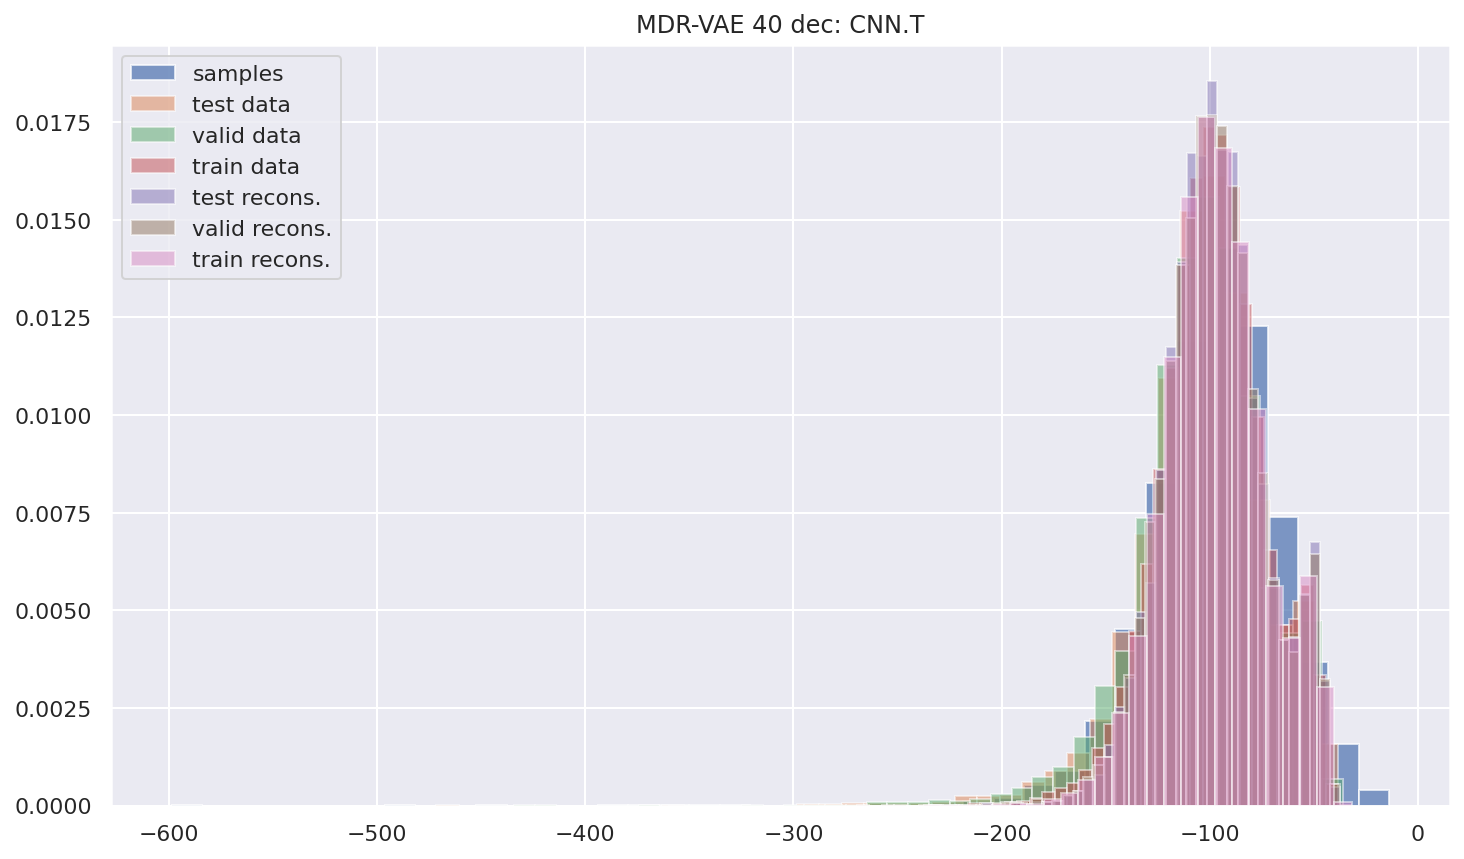

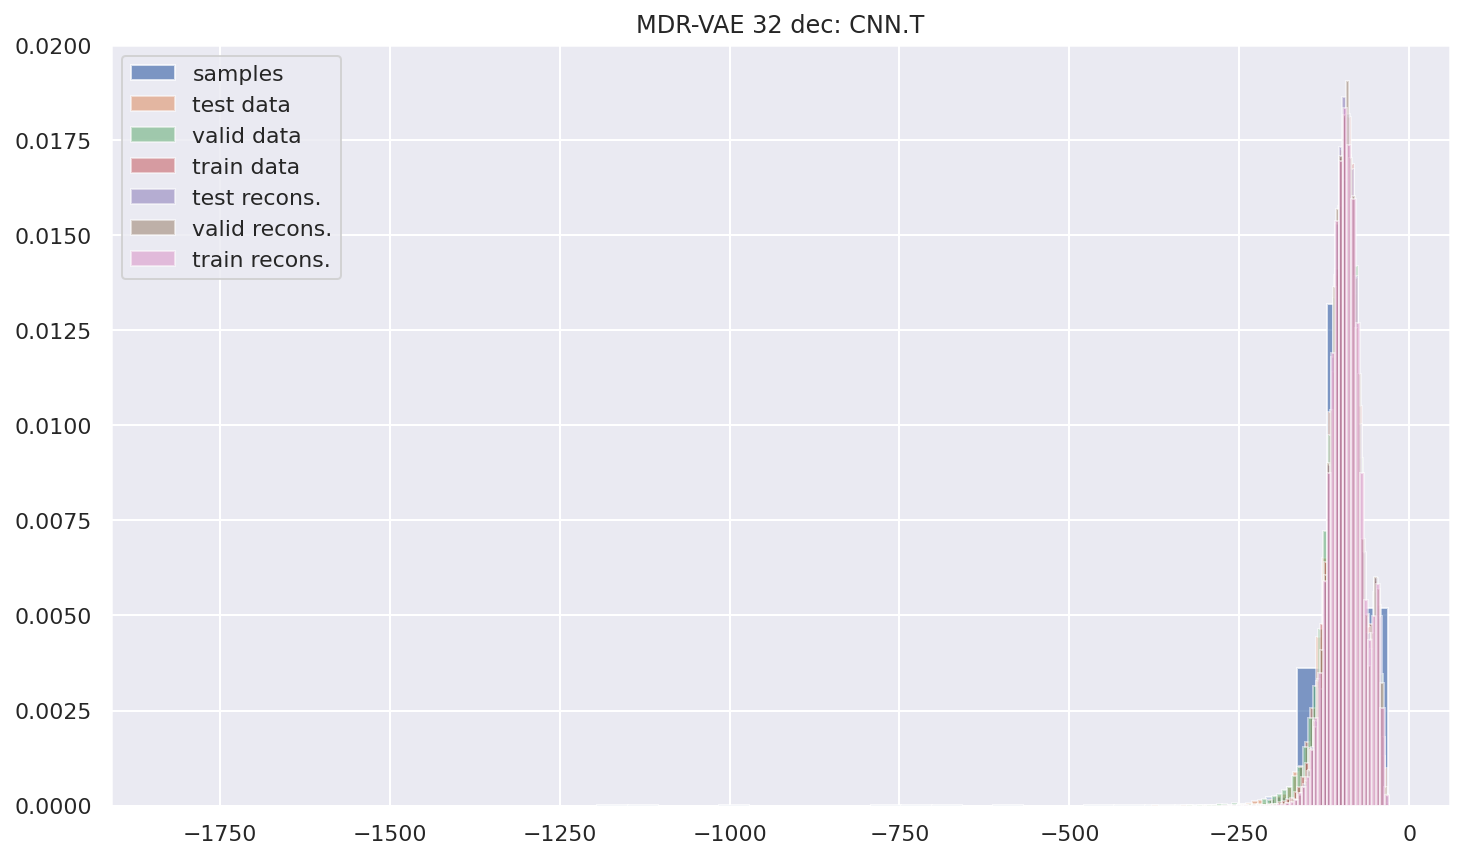

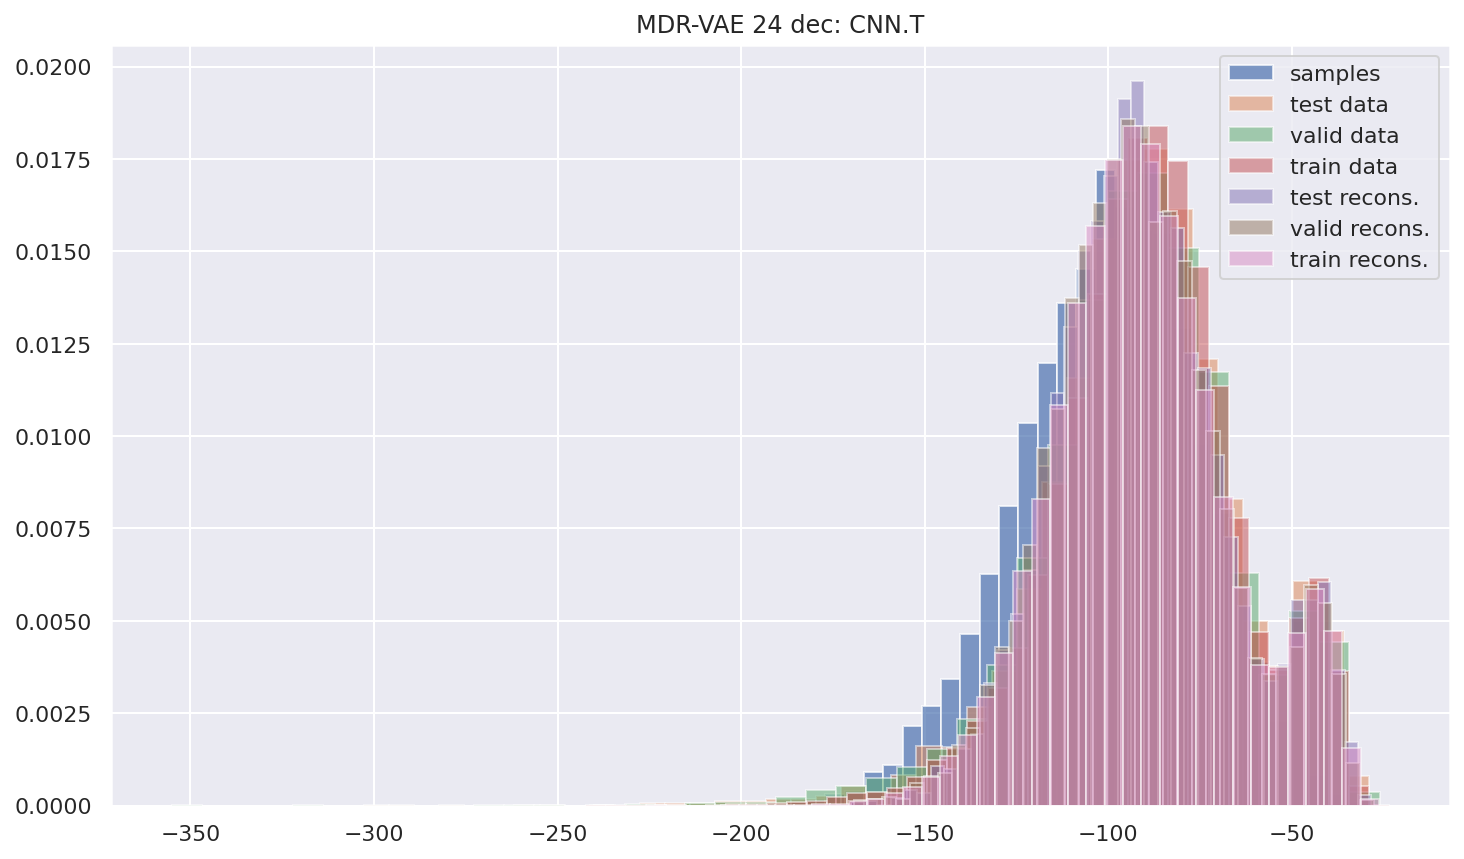

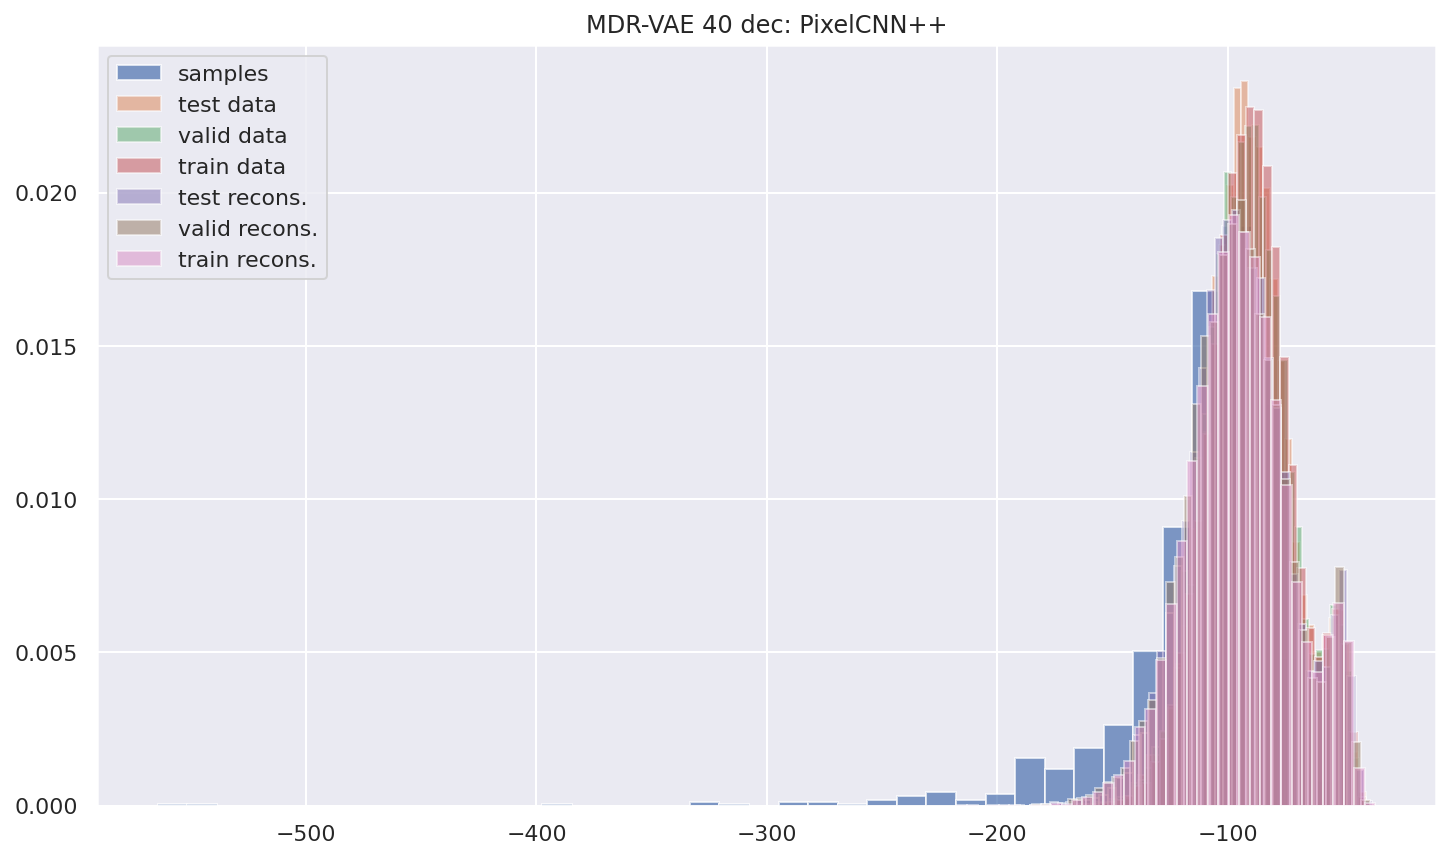

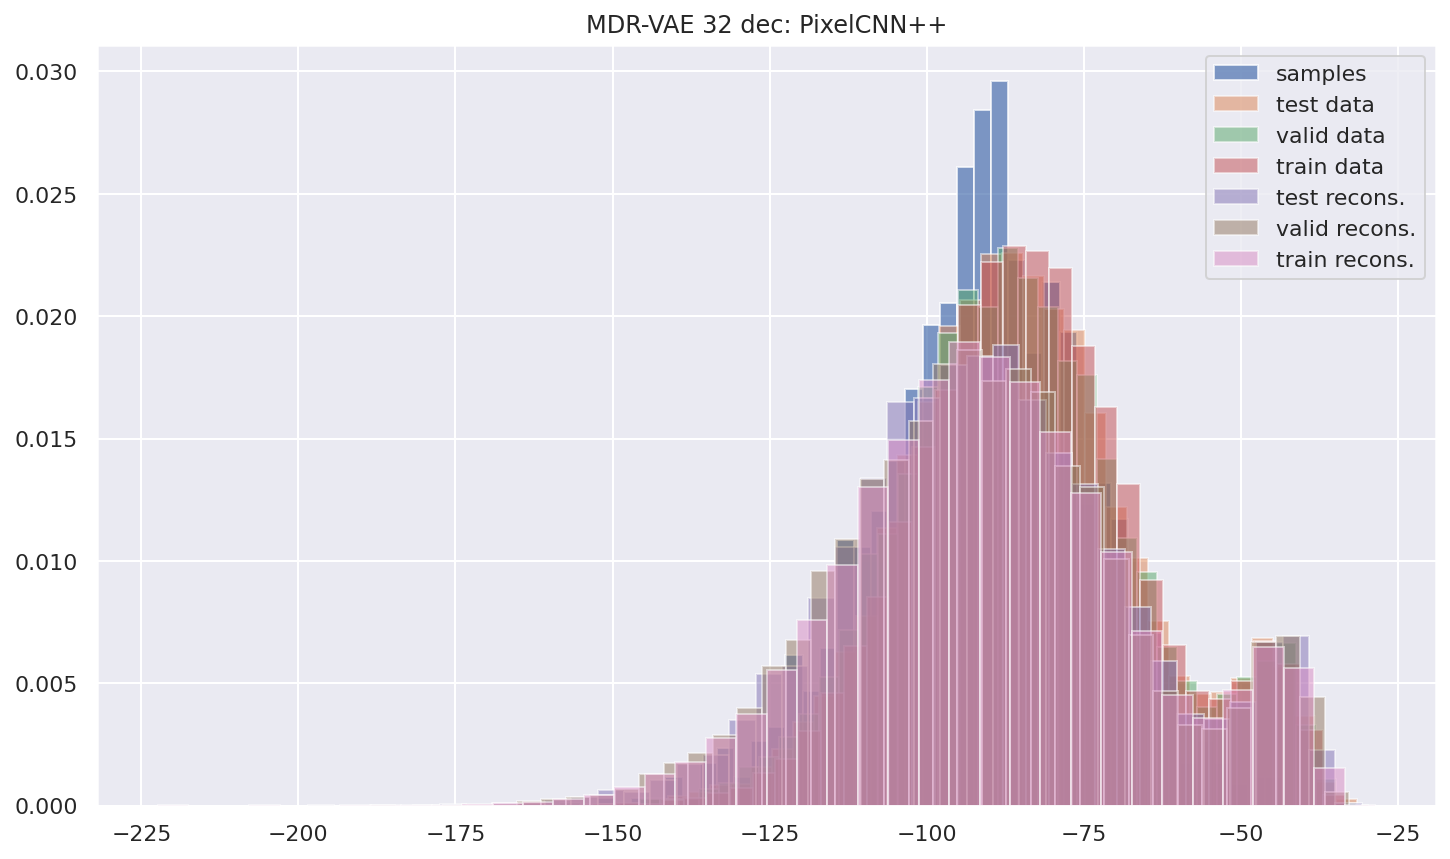

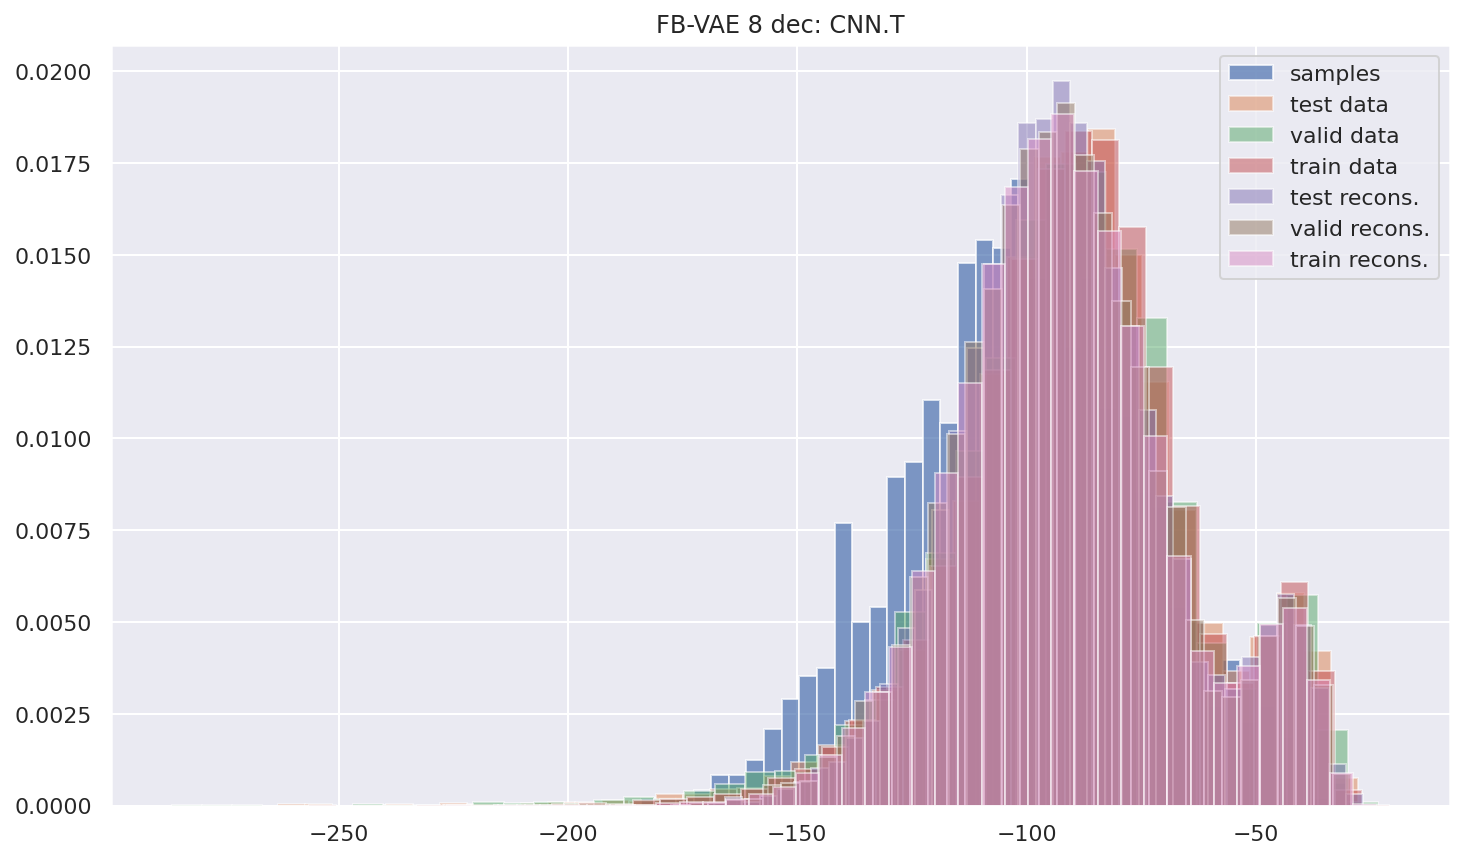

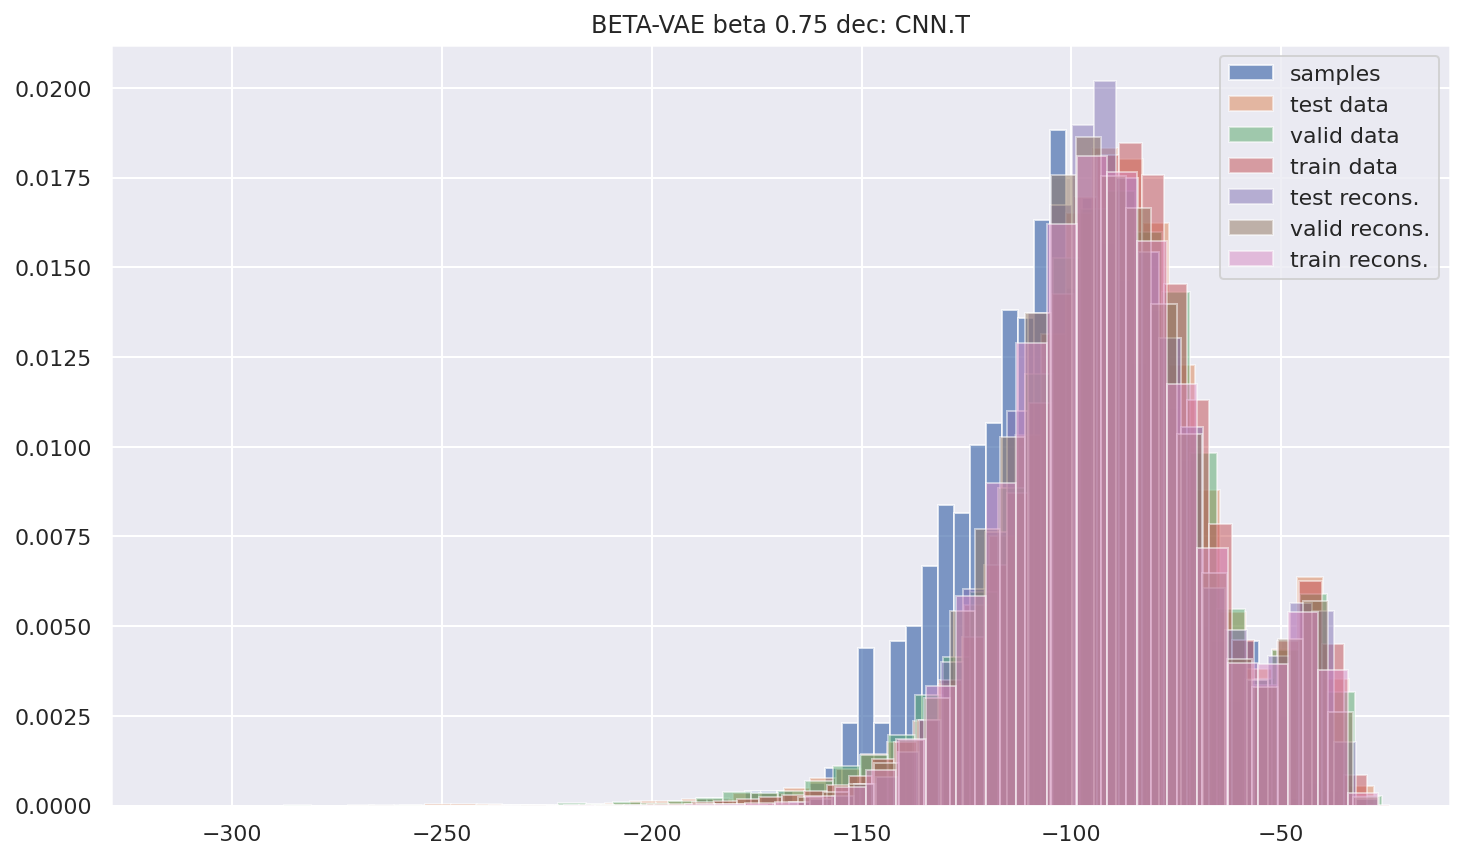

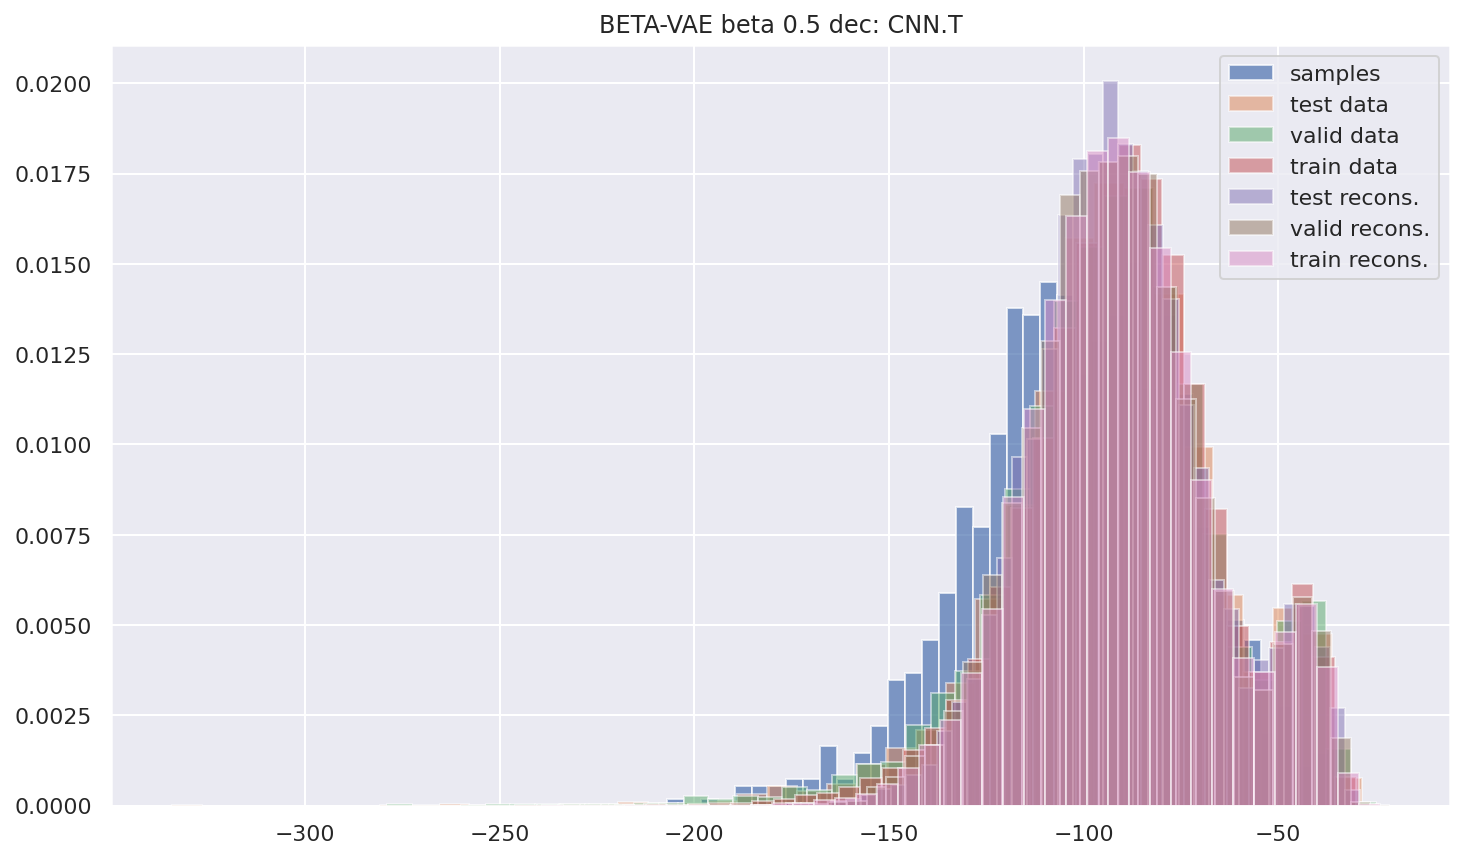

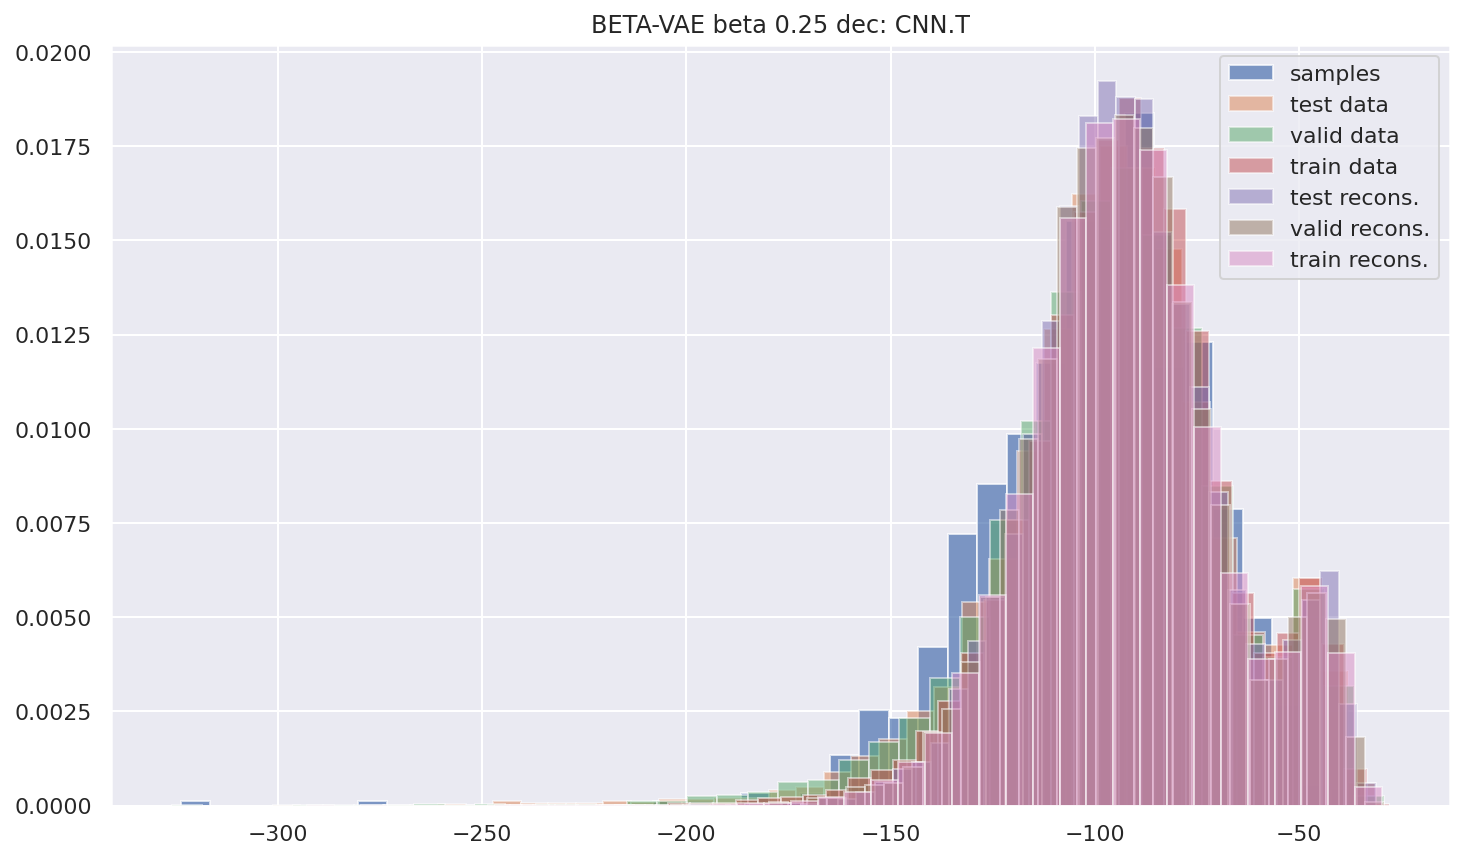

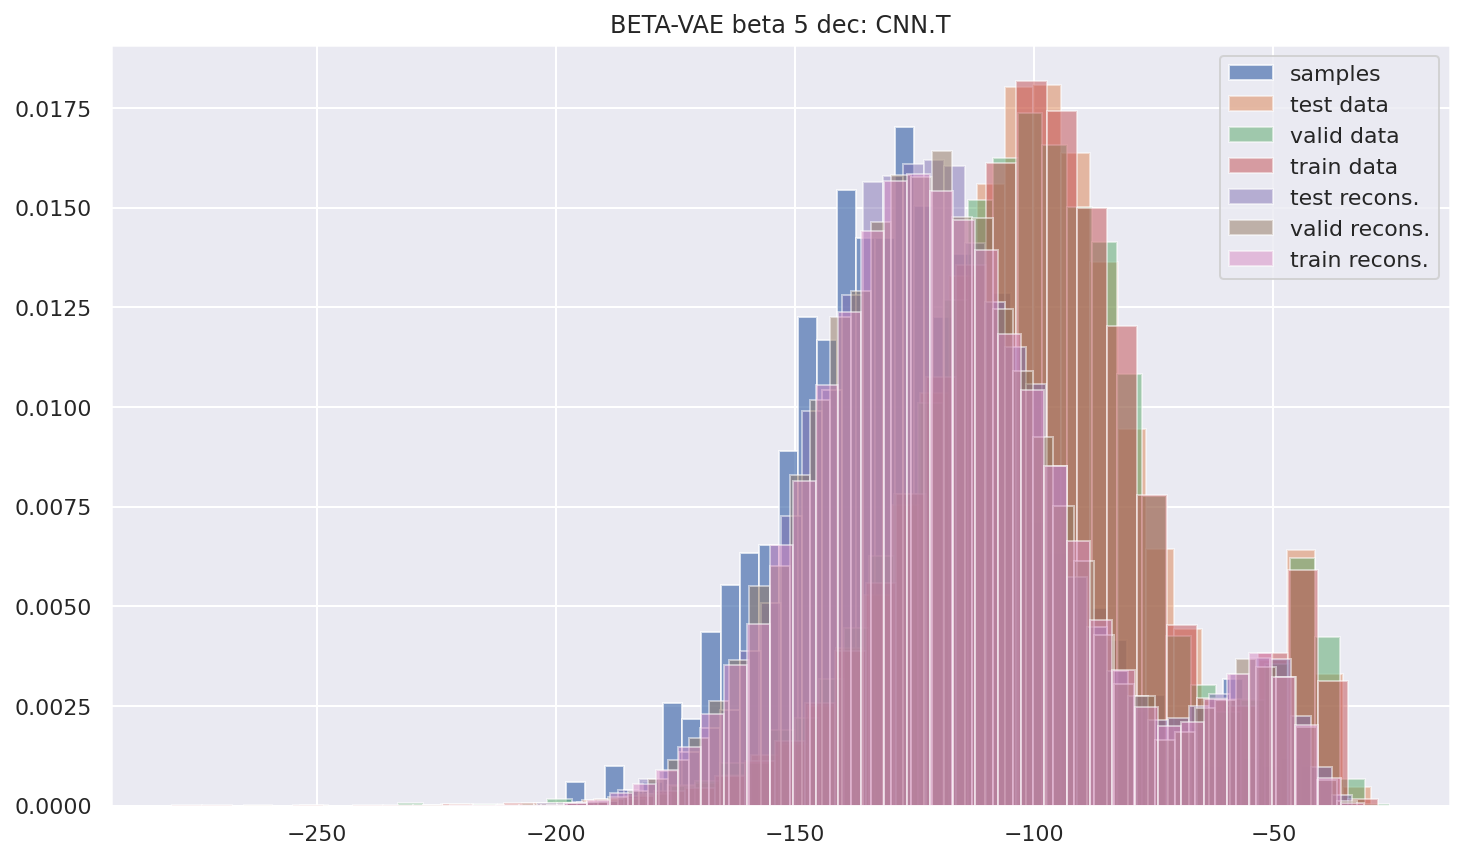

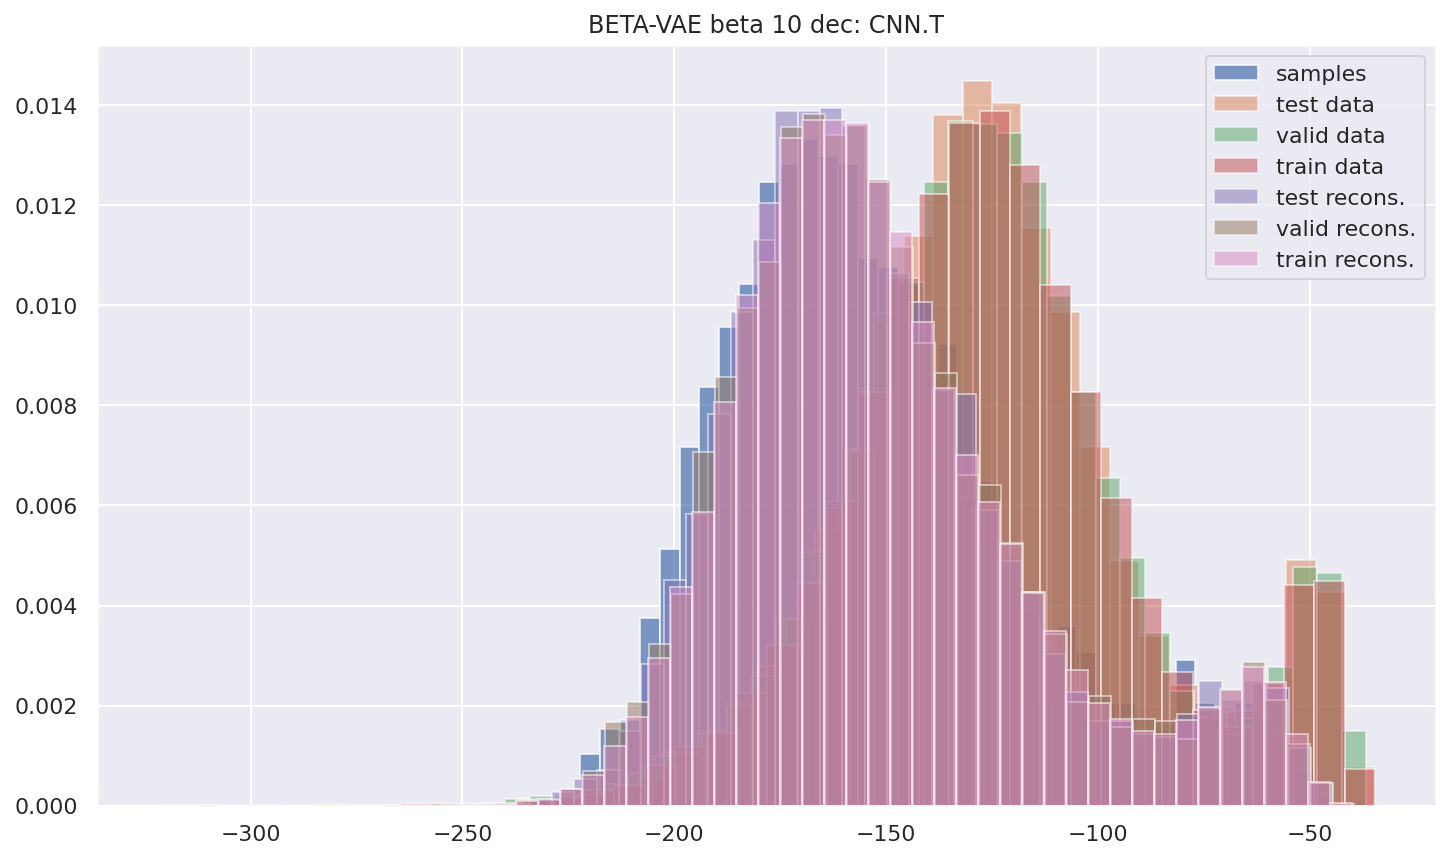

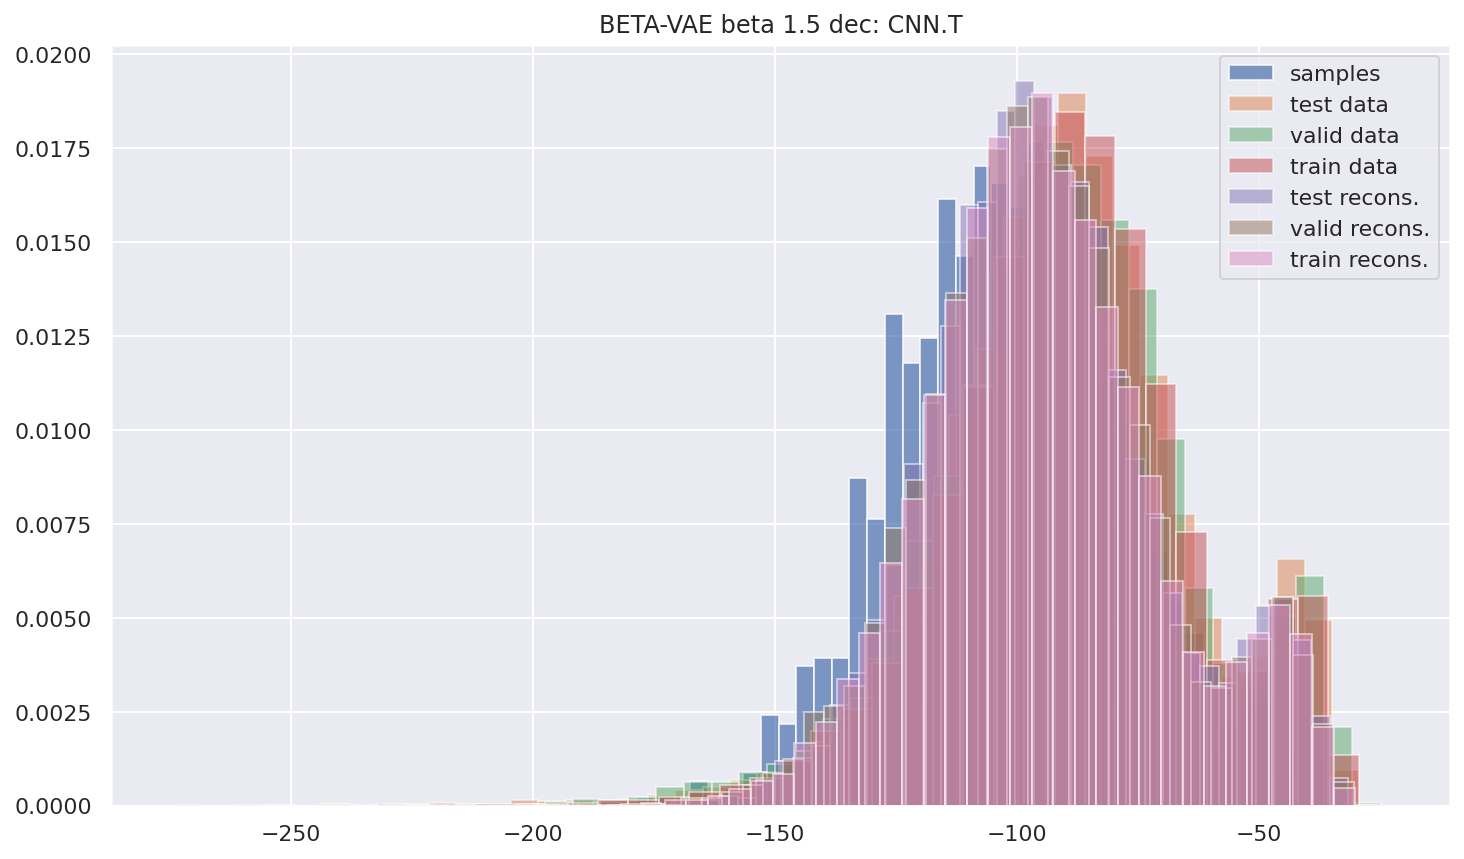

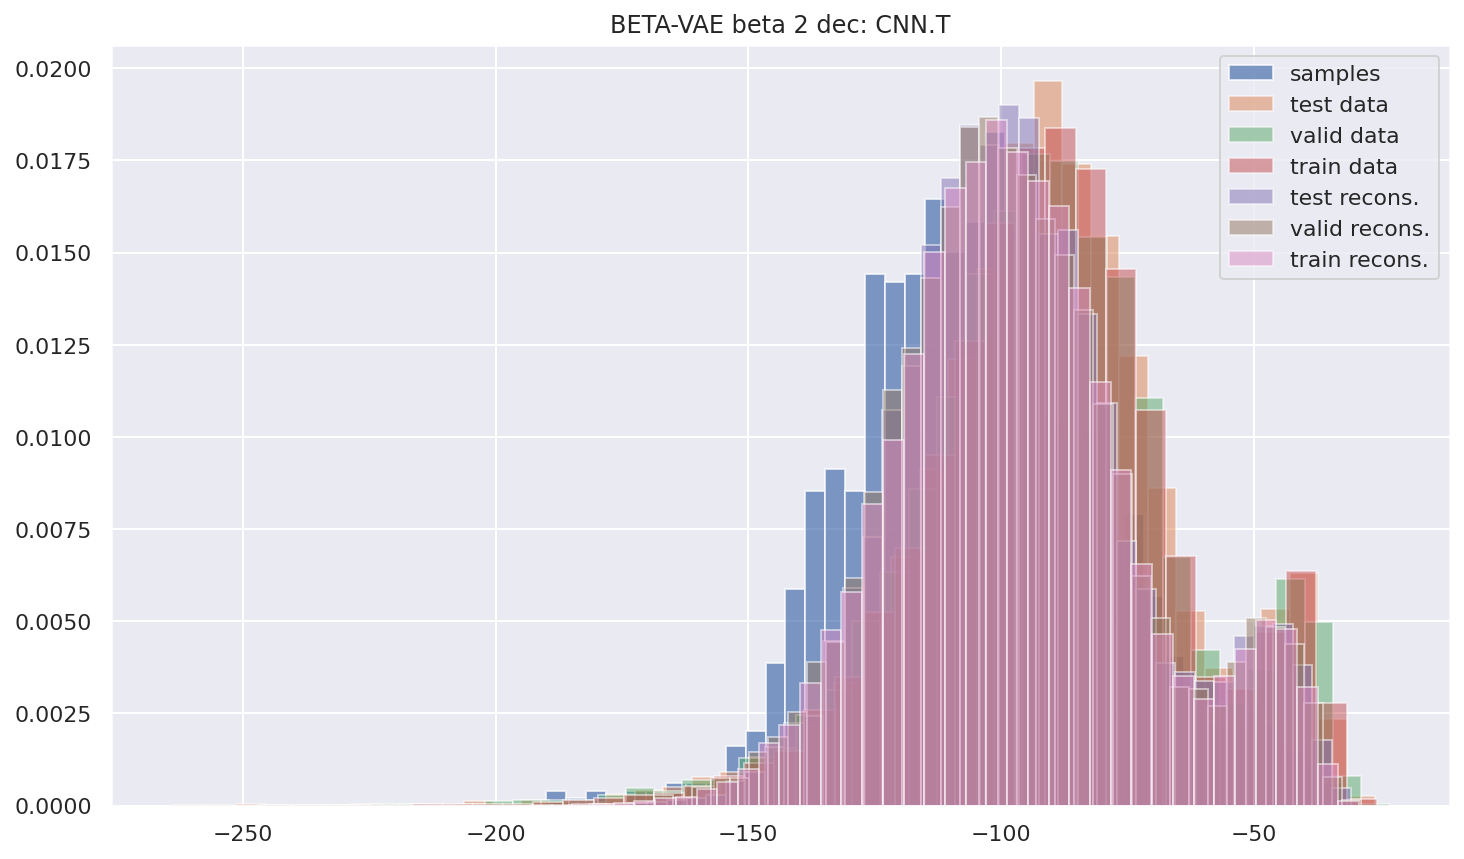

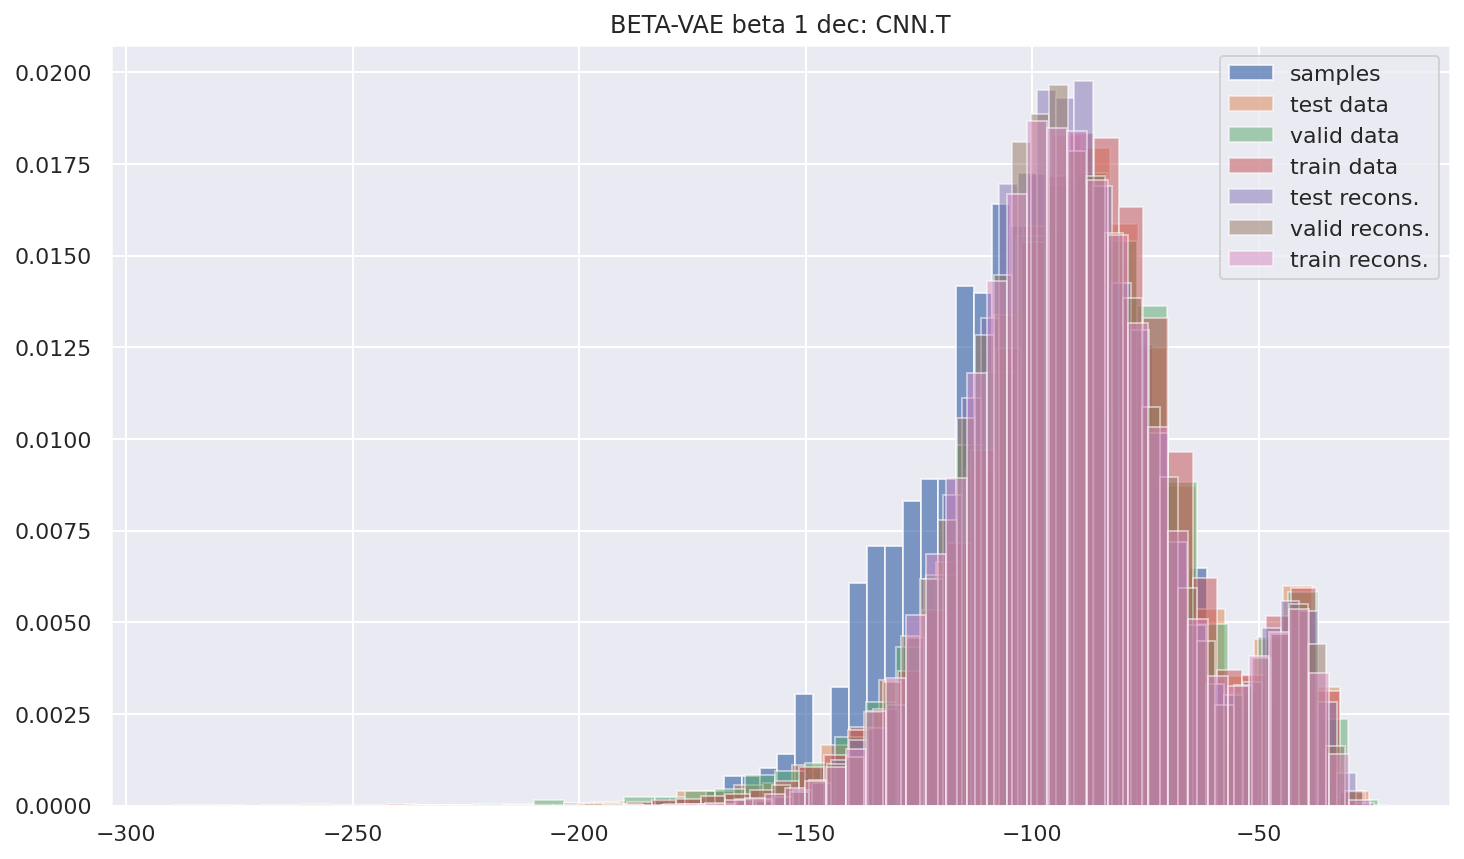

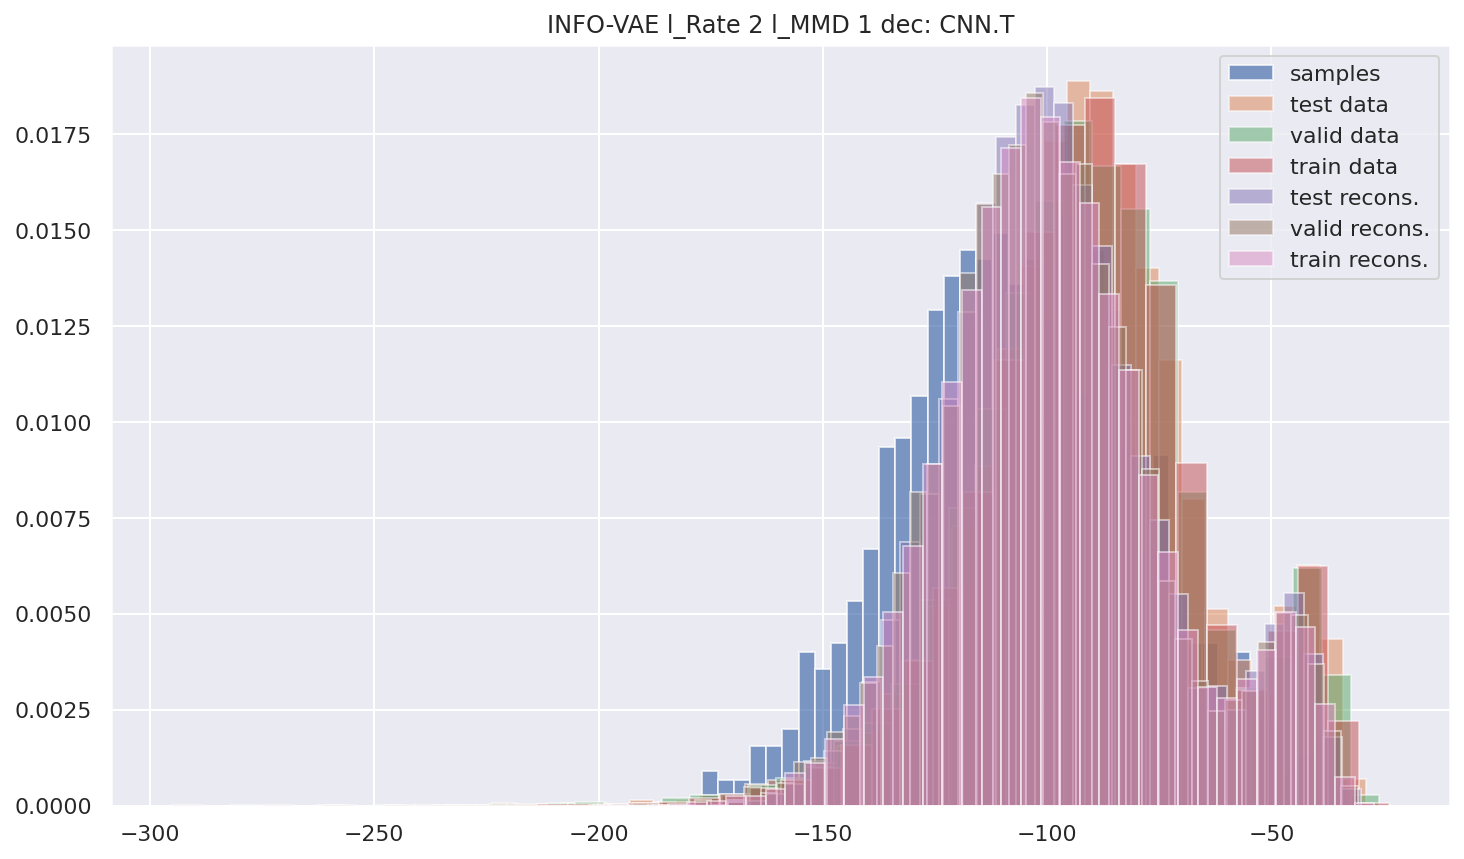

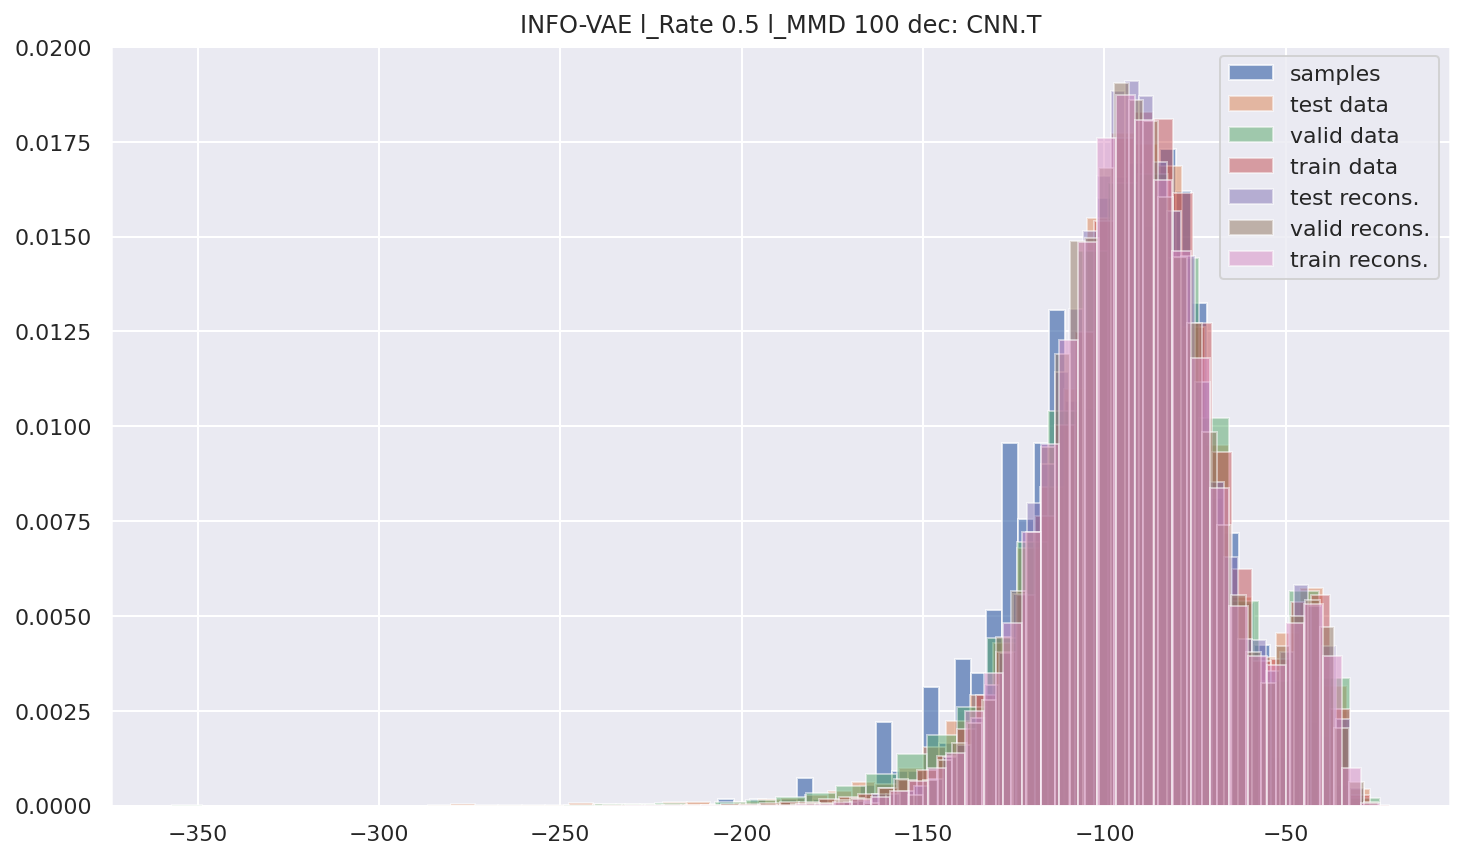

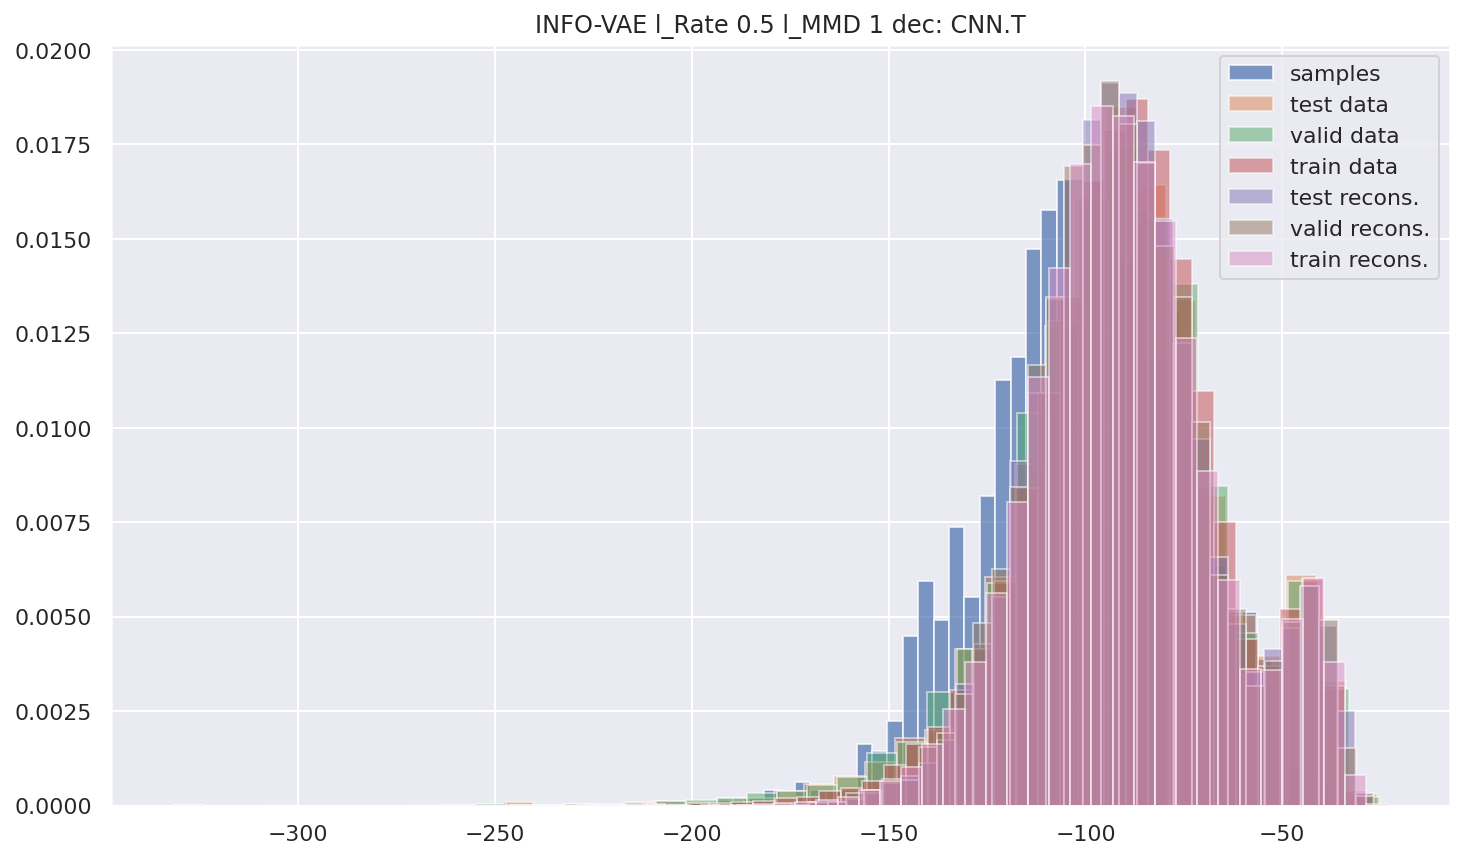

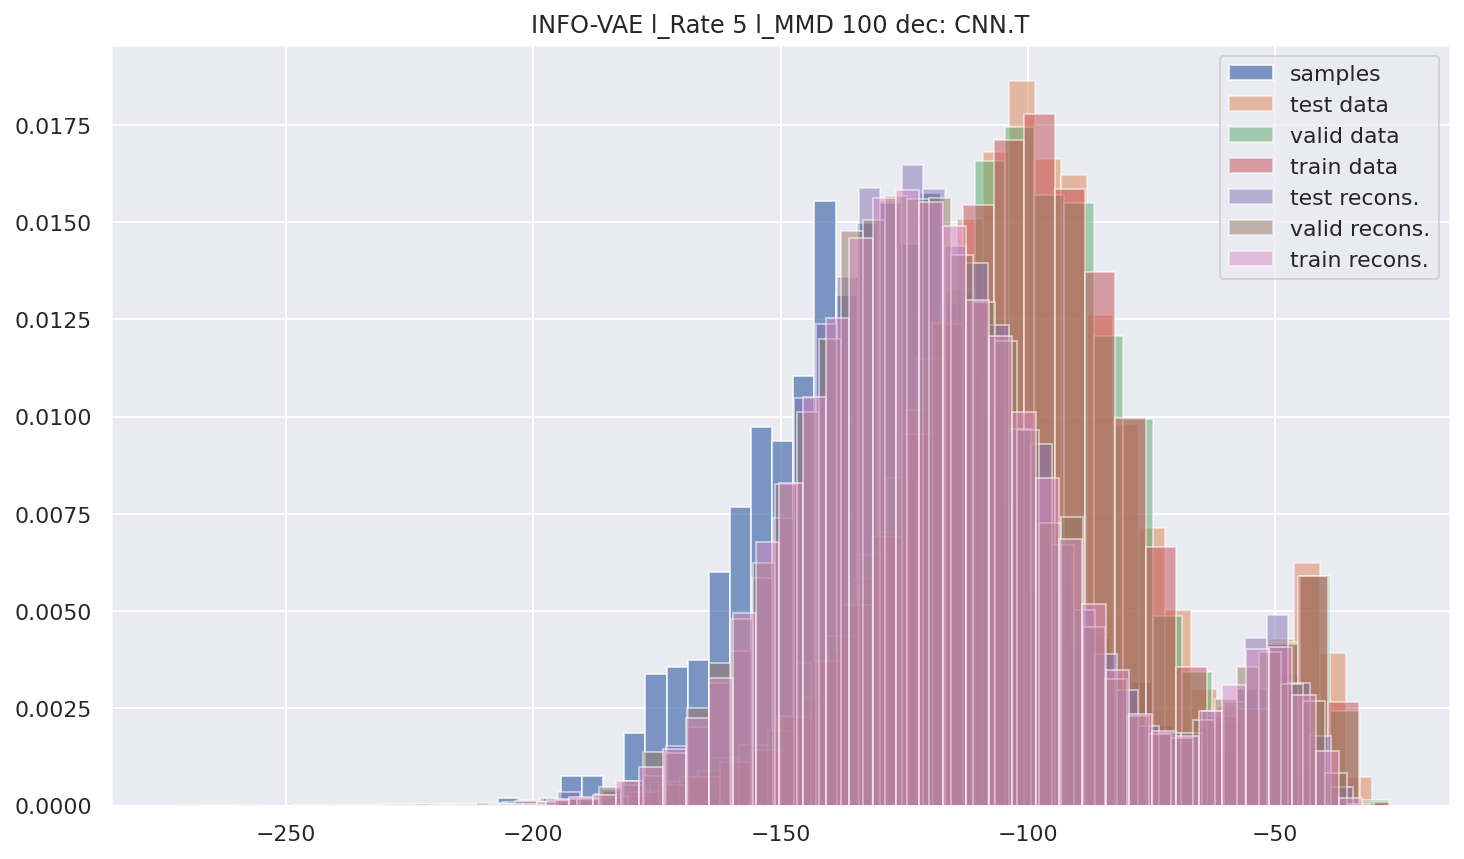

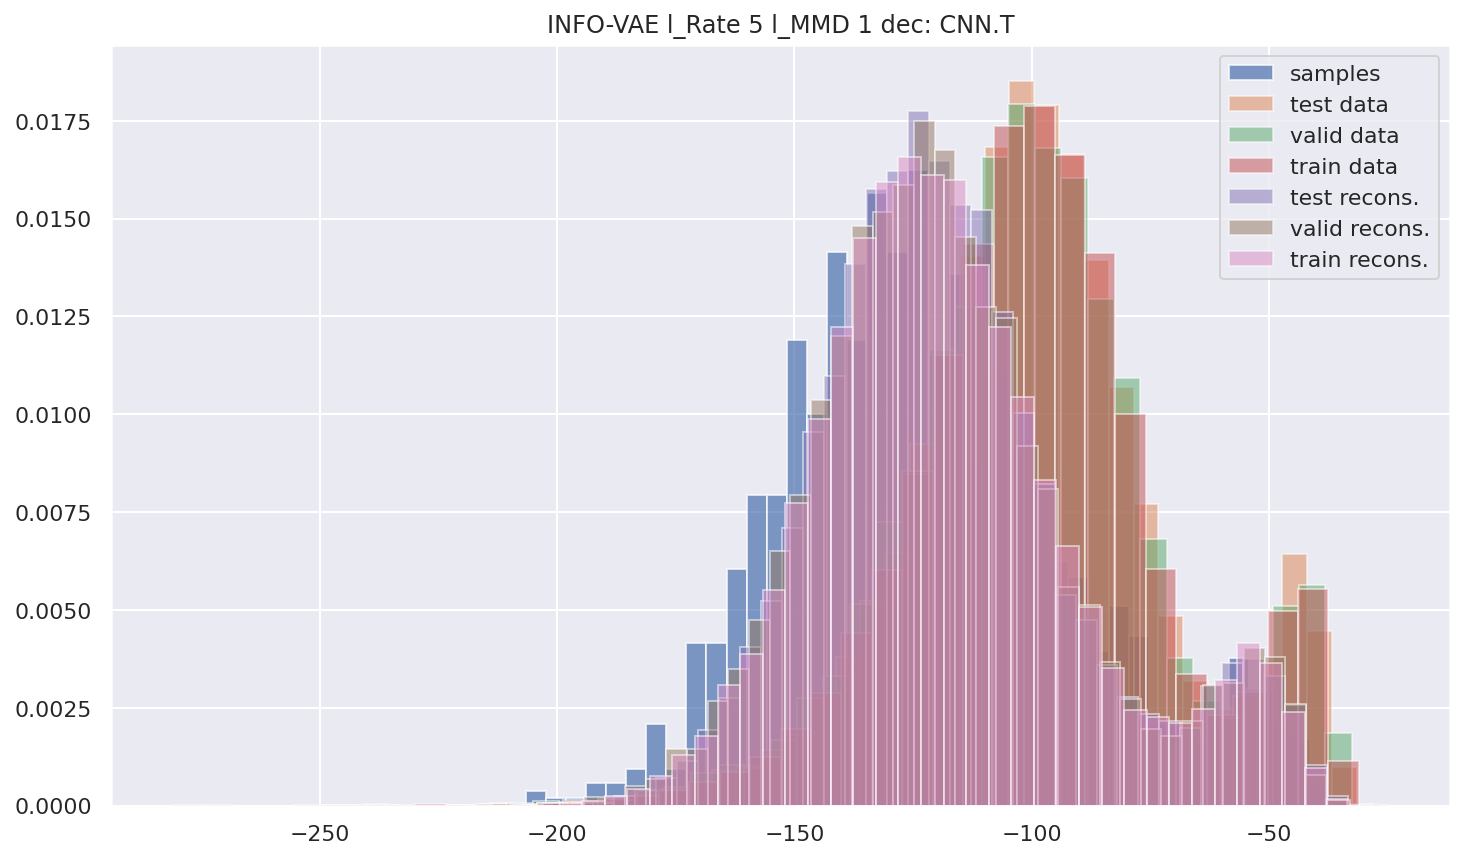

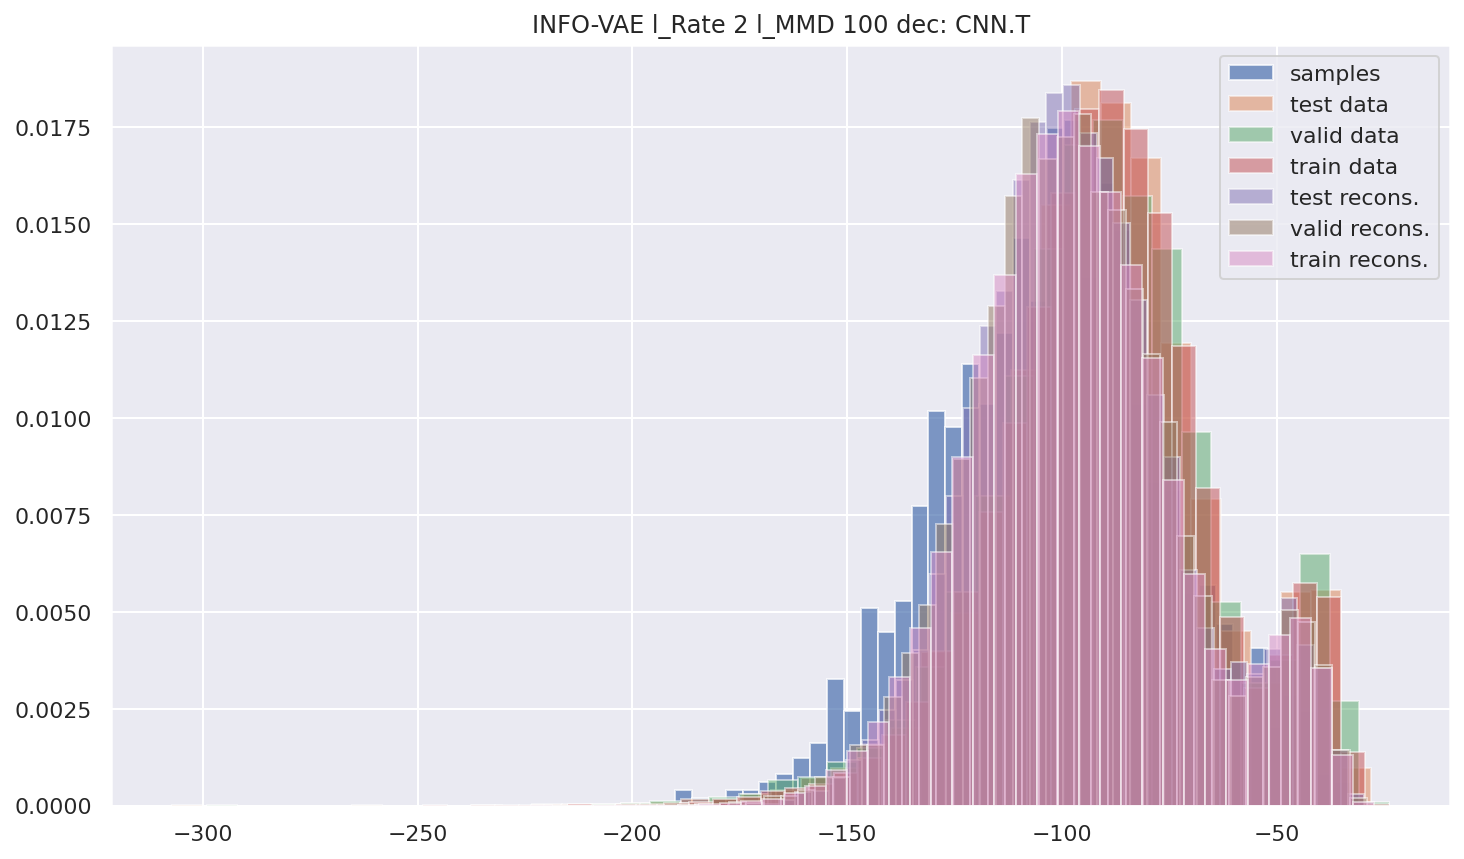

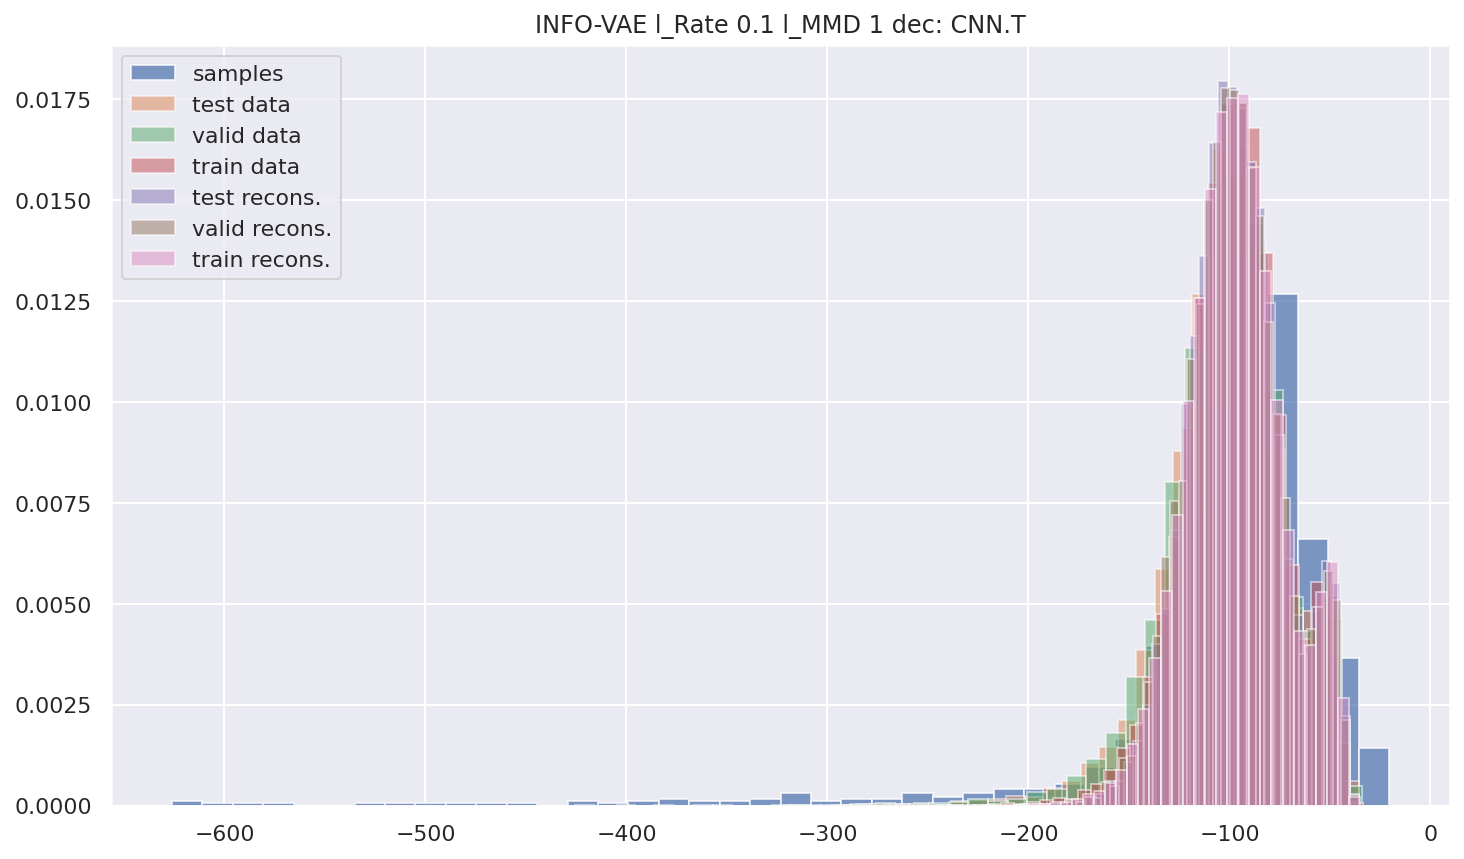

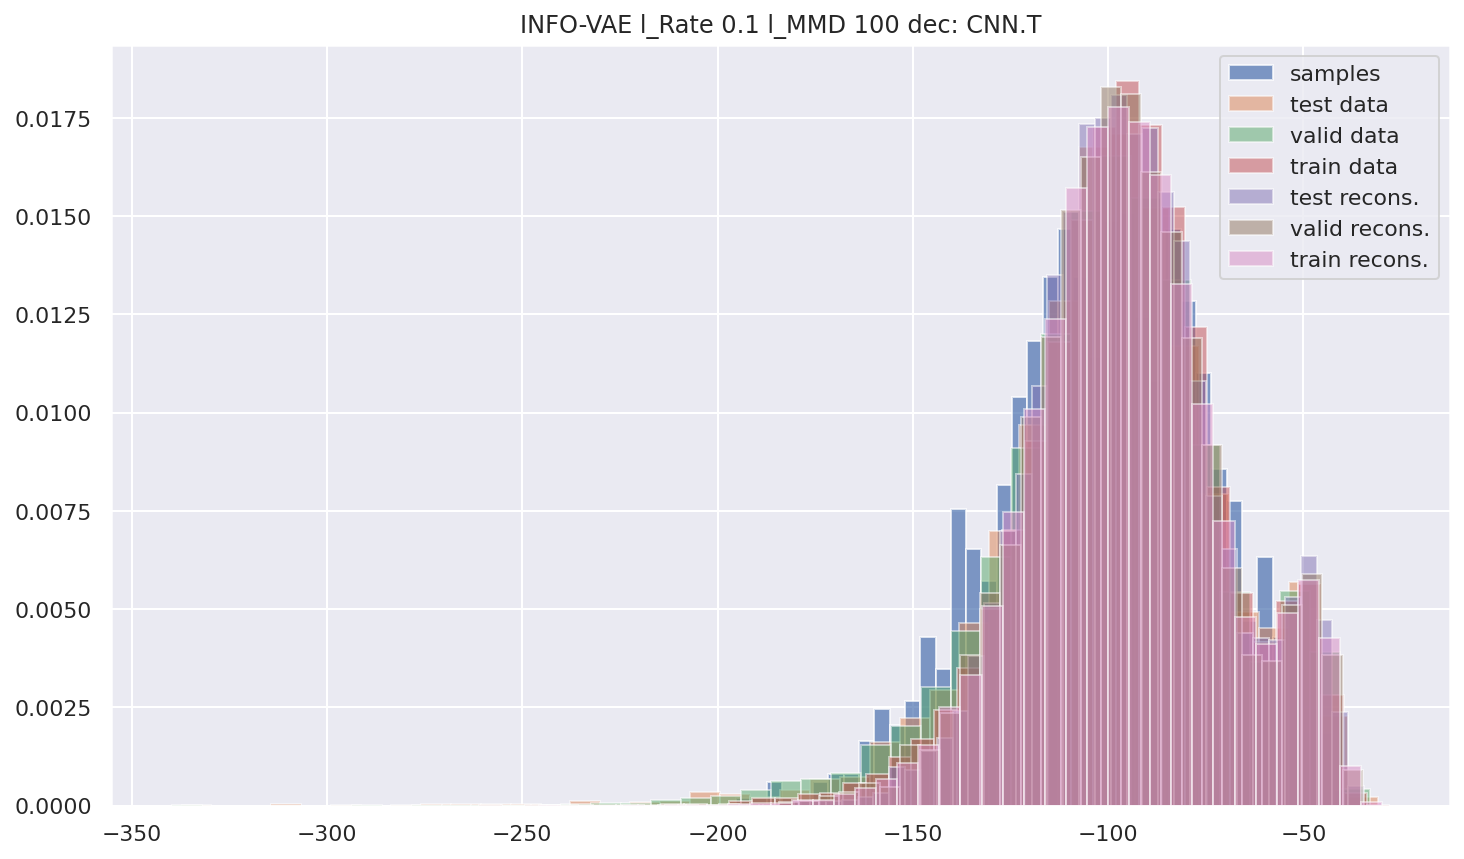

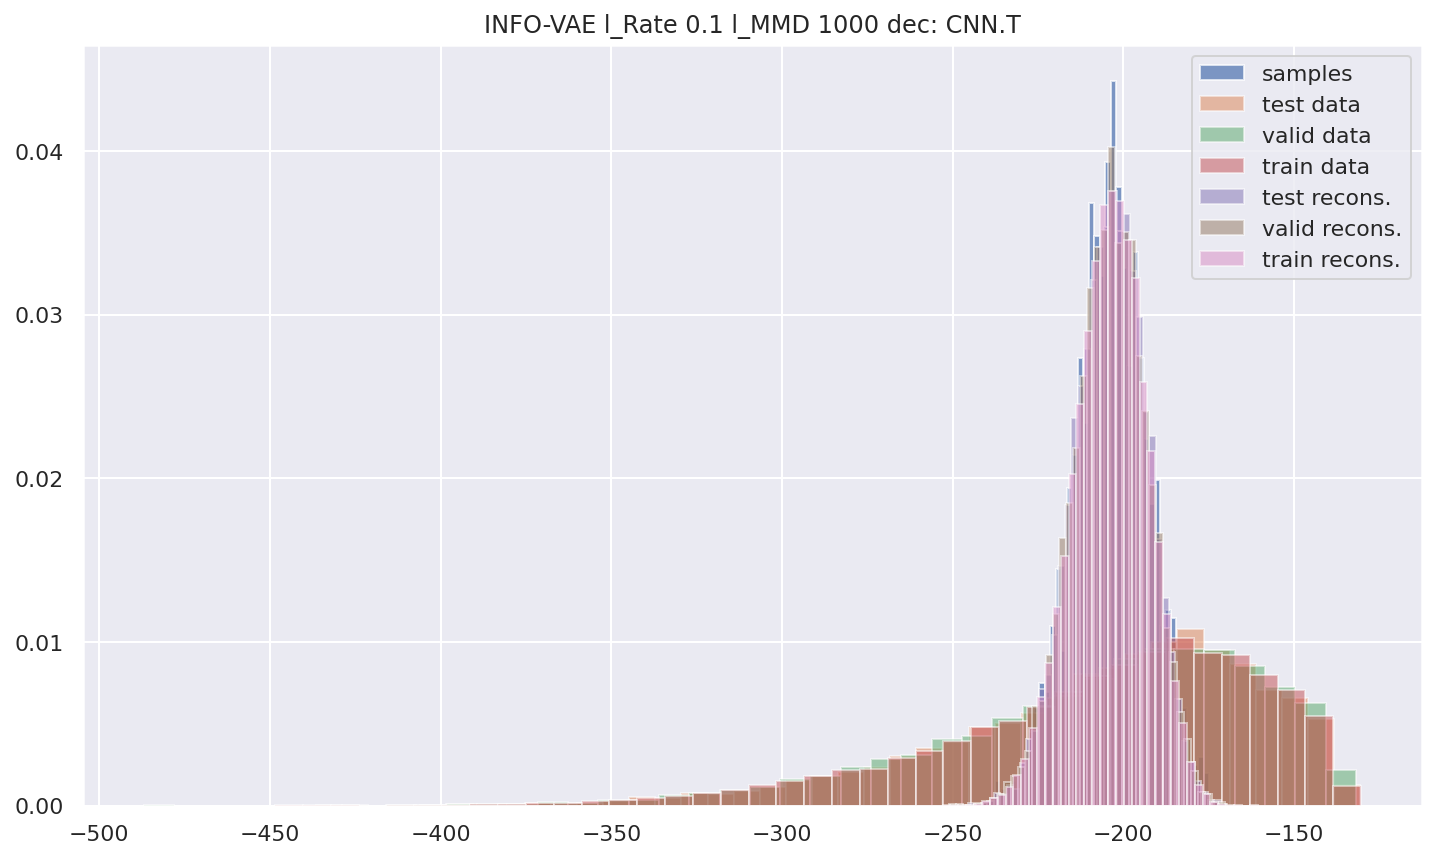

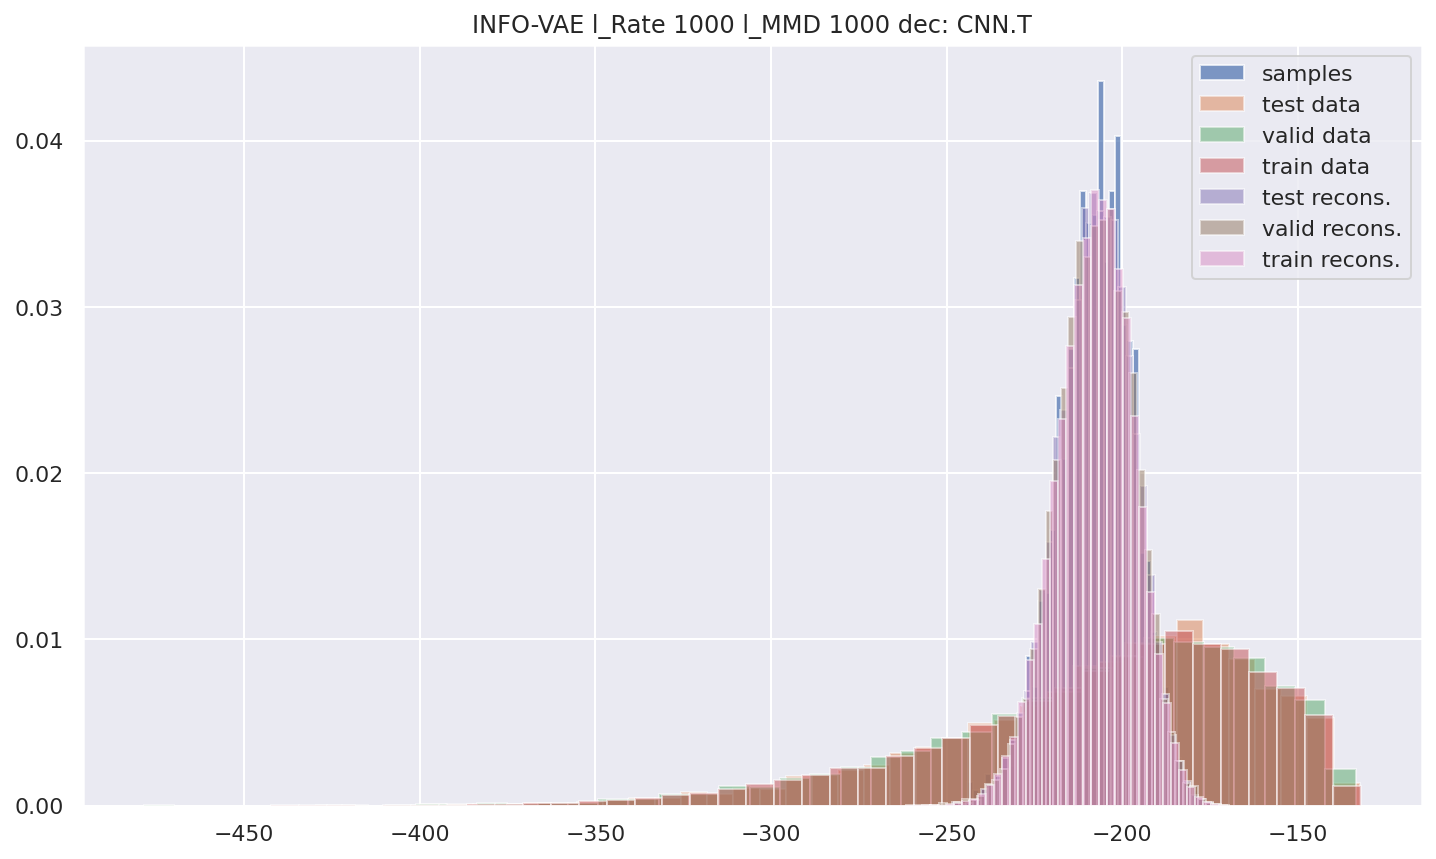

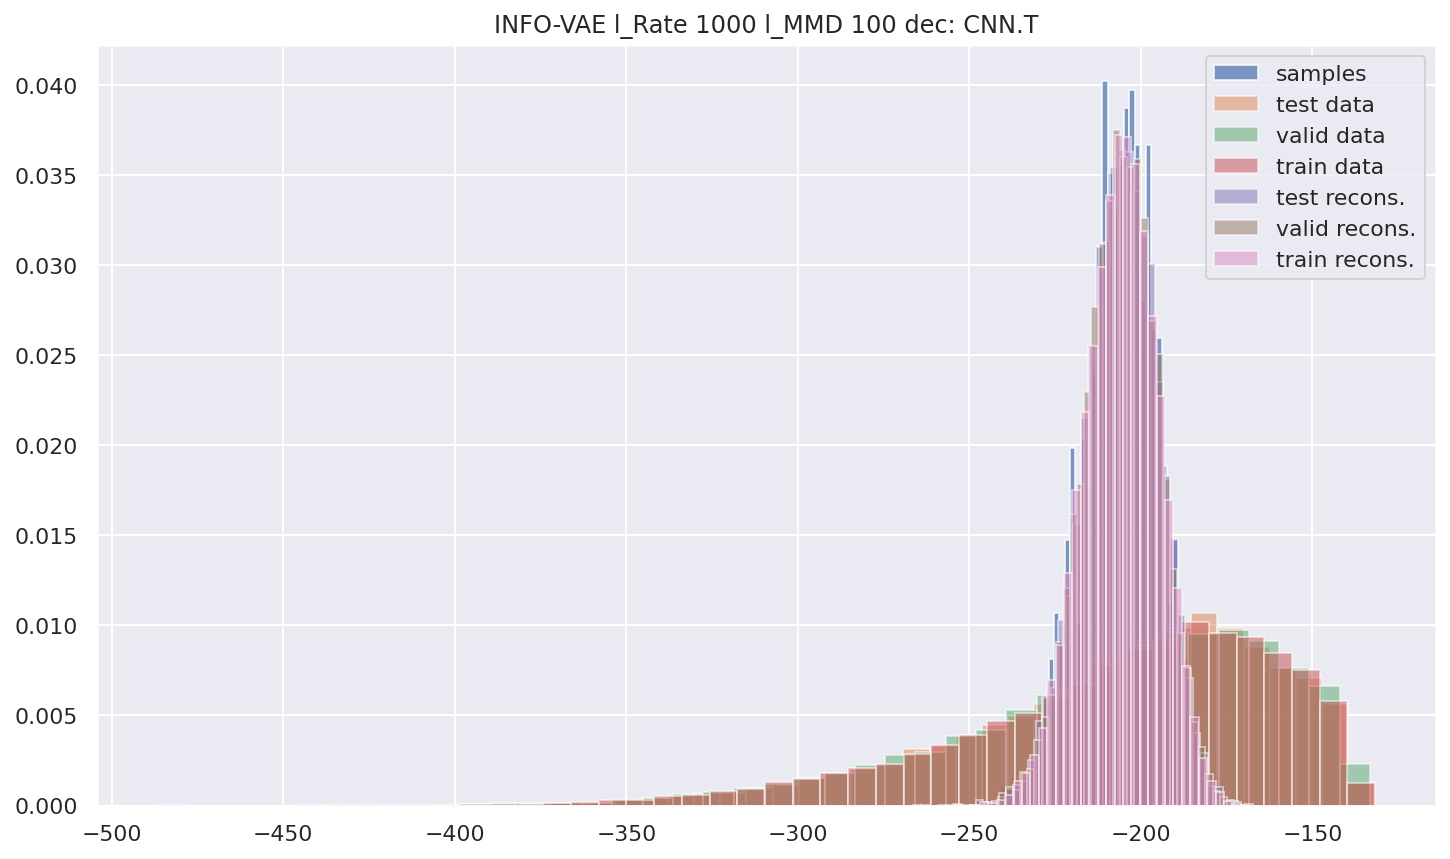

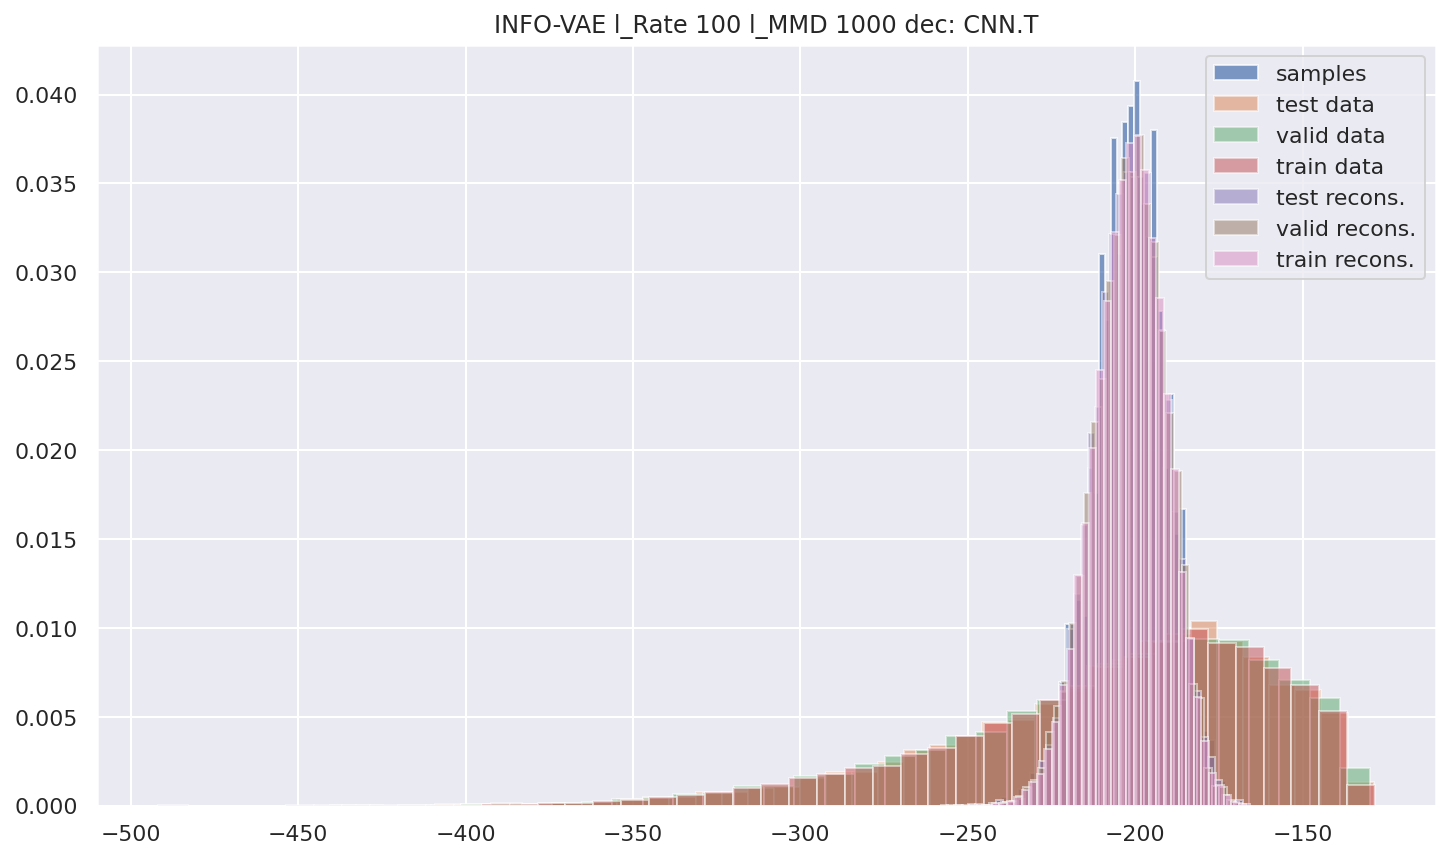

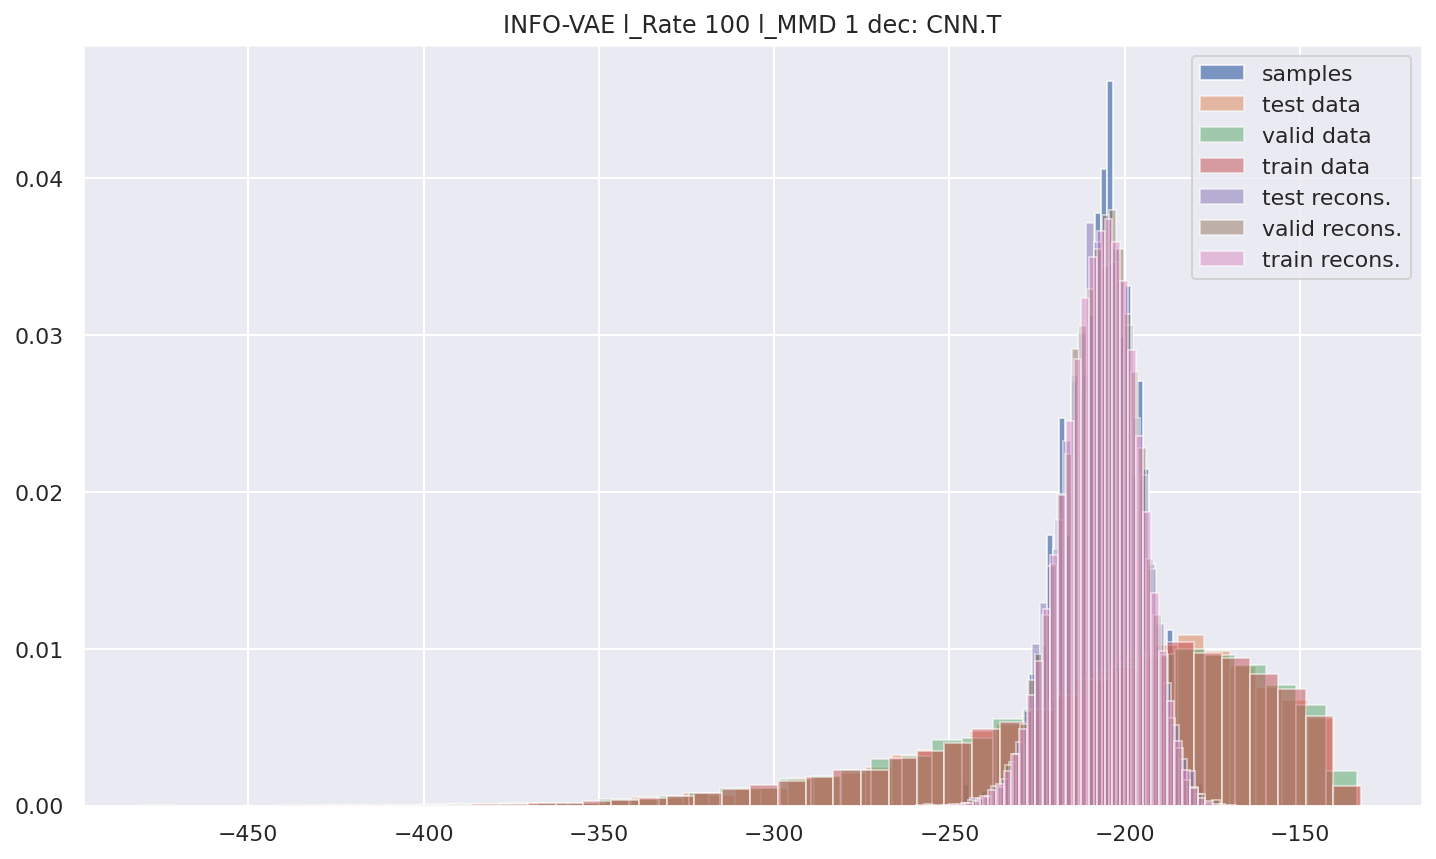

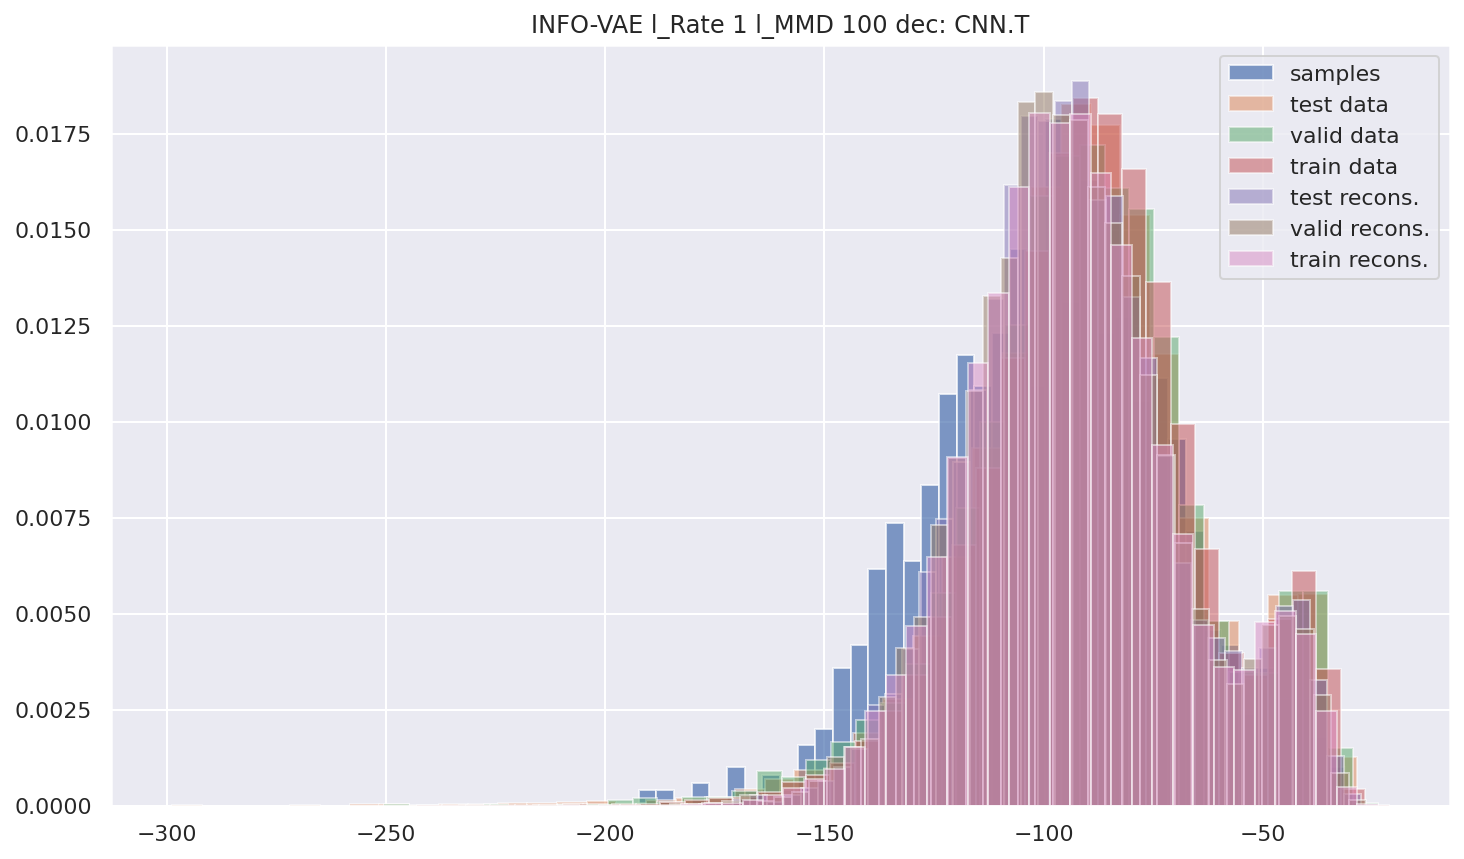

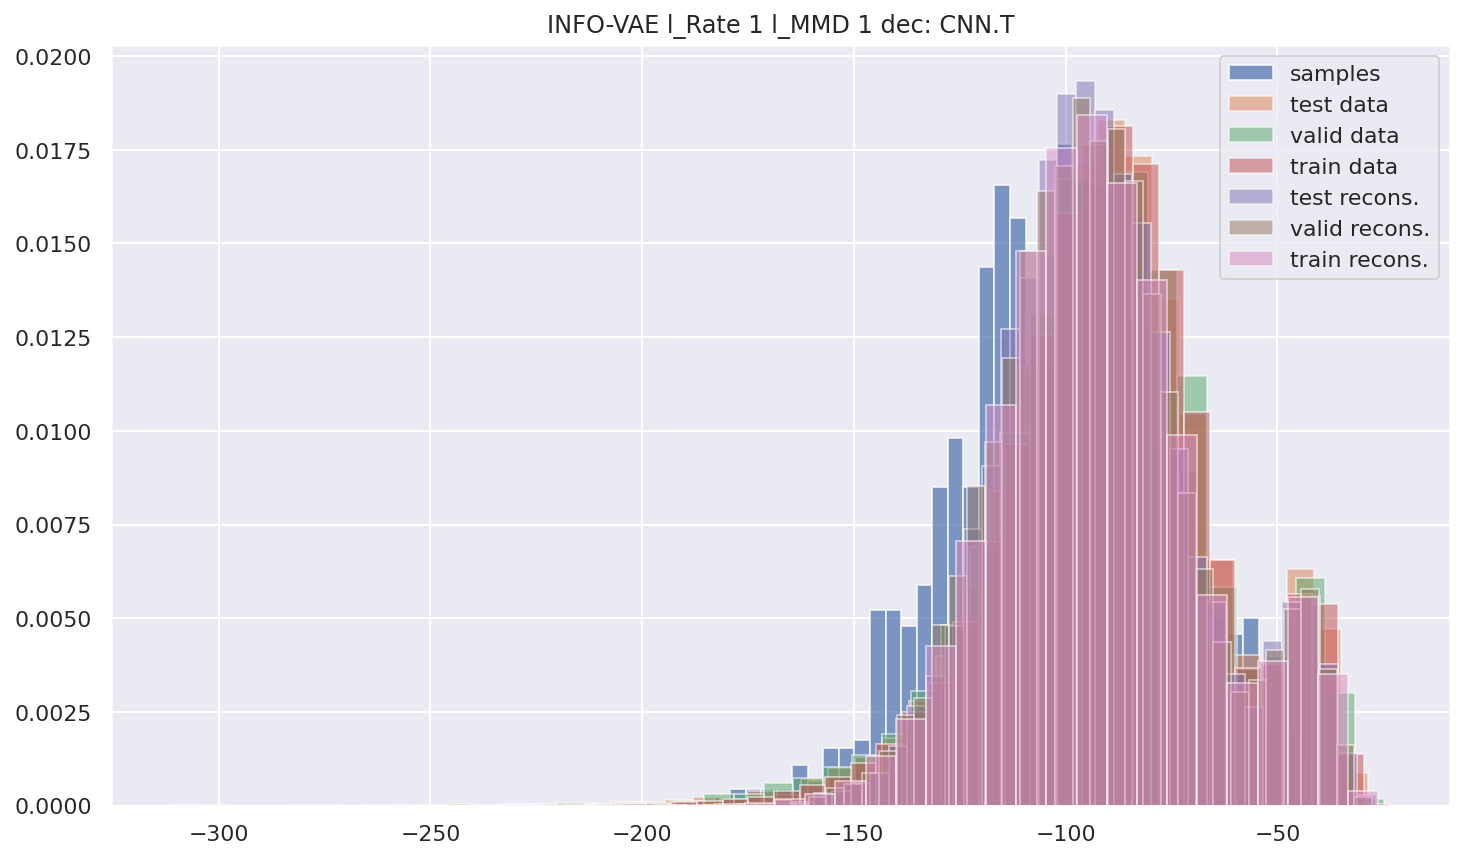

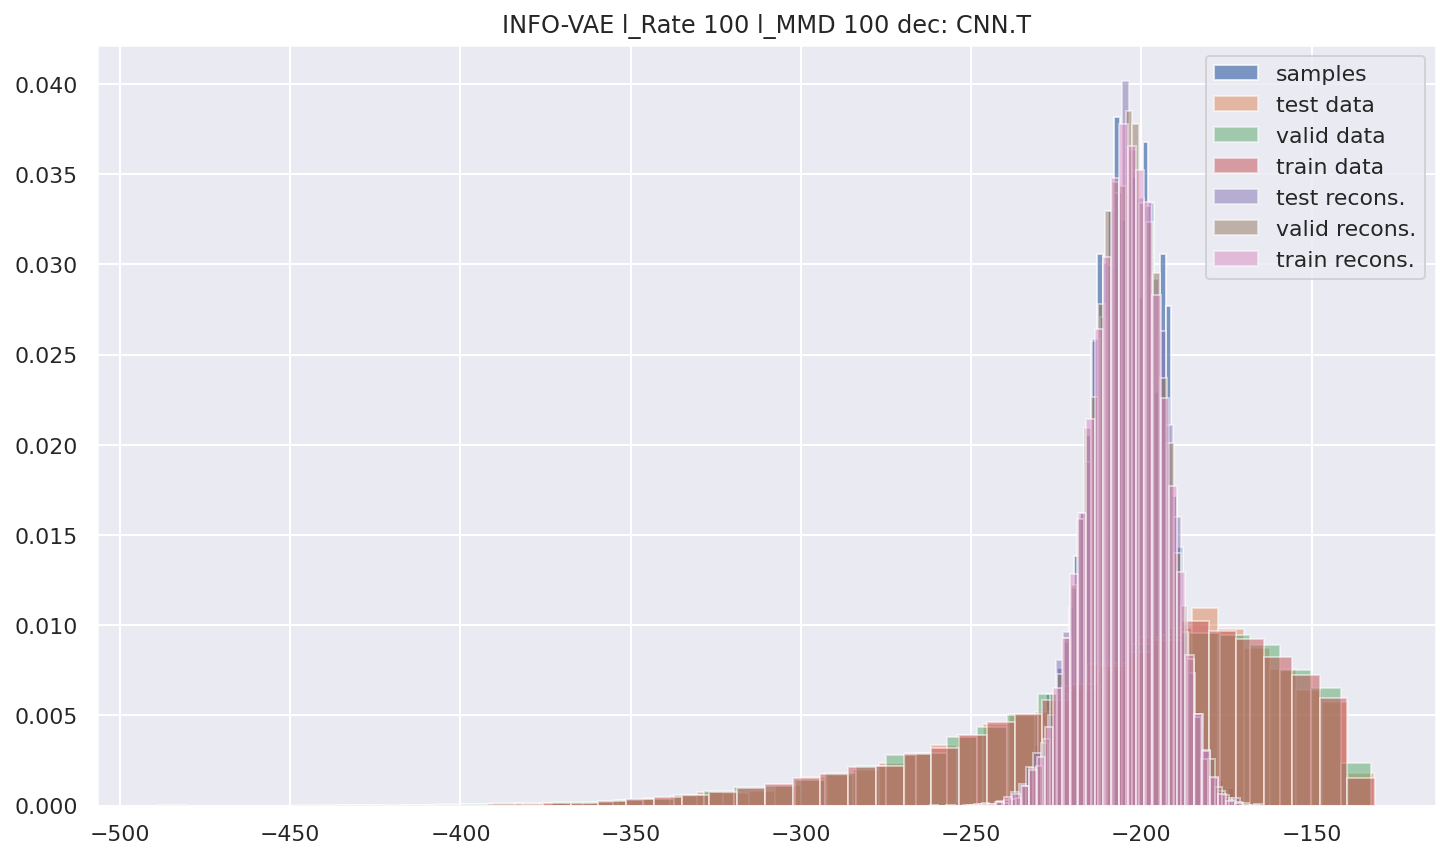

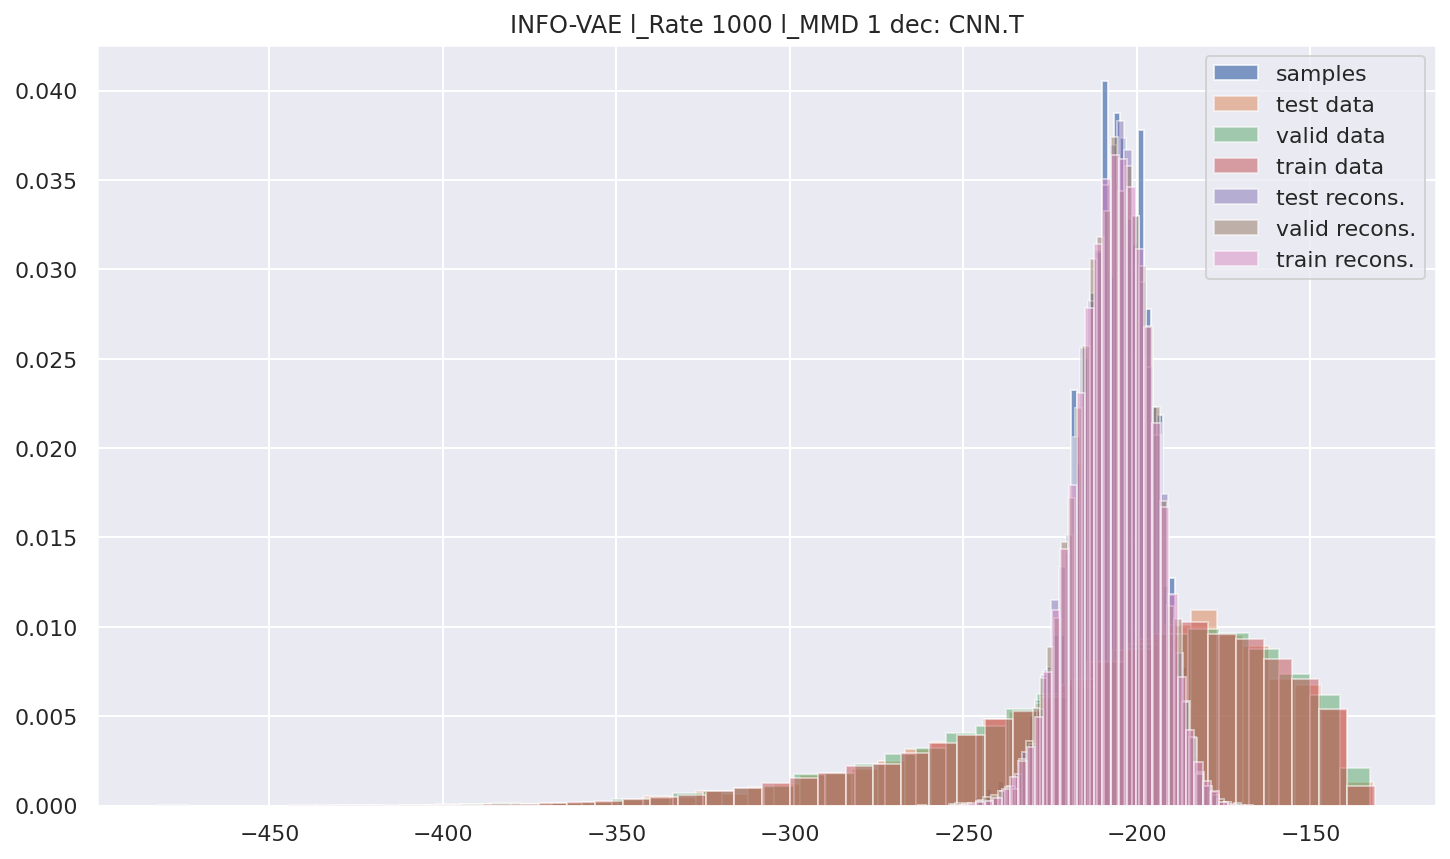

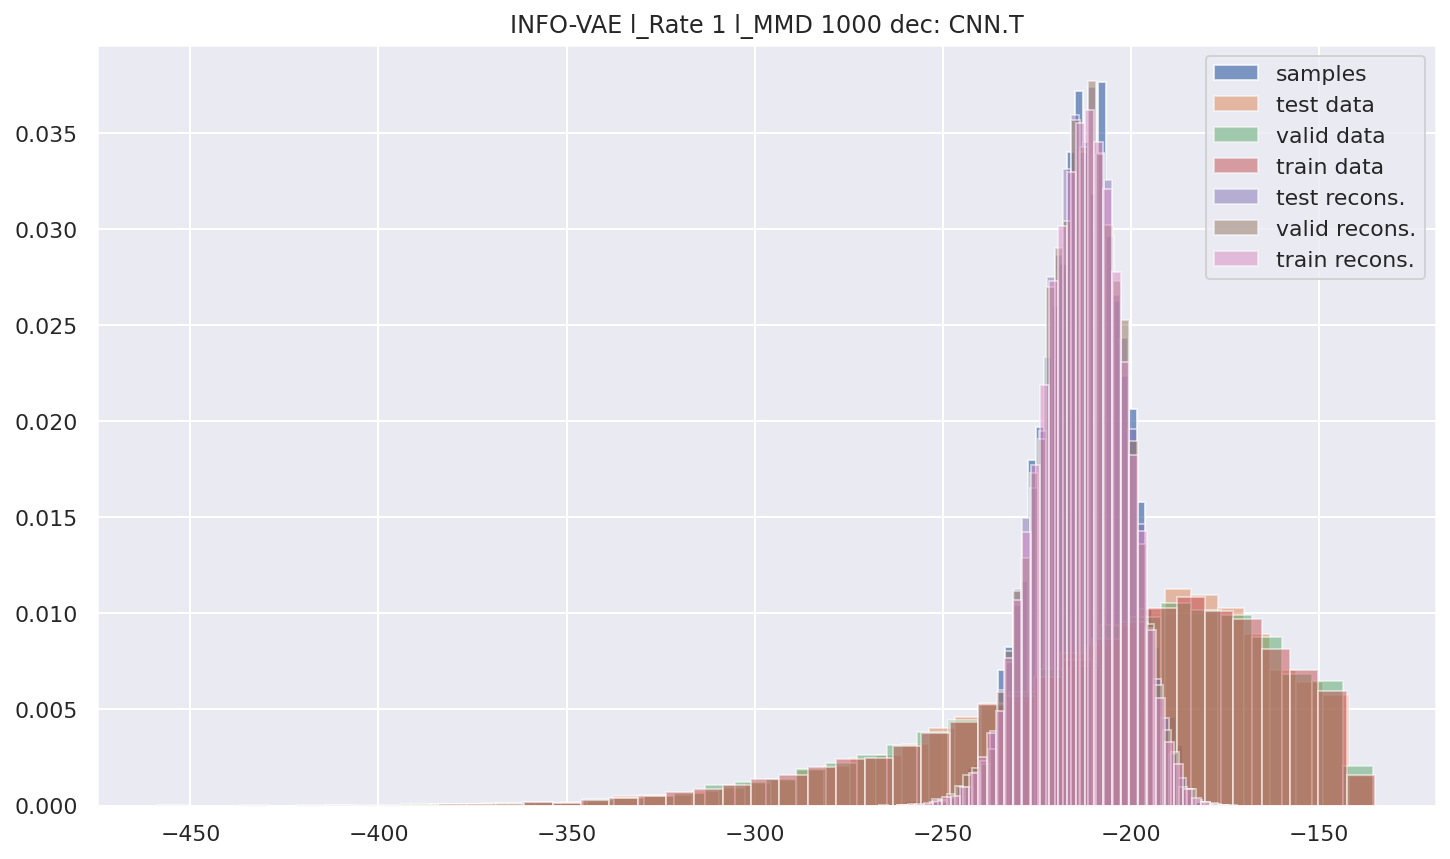

In [16]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns; sns.set()

for i, (run_name, cn) in enumerate(zip(run_df["run_name"].values, run_df.index.values)):
    save_dir = f"{ANALYSIS_DIR}/{run_name}"

    # skip things that are not directories
    if os.path.isfile(save_dir):
        continue
        
    if not (os.path.isfile(f"{save_dir}/{SURPRISAL_DATA_FILE}") and 
            os.path.isfile(f"{save_dir}/{SURPRISAL_SAMPLE_FILE}") and
            os.path.isfile(f"{save_dir}/{SURPRISAL_RECONSTRUCT_FILE}")):
        continue
        
    # SUPRISAL STATS
    if os.path.isfile(f"{save_dir}/{SURPRISAL_DATA_FILE}"):
        surprisal_data = torch.load(f"{save_dir}/{SURPRISAL_DATA_FILE}")
        
        if not "train" in surprisal_data:
            continue
           
    if os.path.isfile(f"{save_dir}/{SURPRISAL_SAMPLE_FILE}"):
        surprisal_samples = torch.load(f"{save_dir}/{SURPRISAL_SAMPLE_FILE}")
    
    if os.path.isfile(f"{save_dir}/{SURPRISAL_RECONSTRUCT_FILE}"):
        surprisal_recons = torch.load(f"{save_dir}/{SURPRISAL_RECONSTRUCT_FILE}")
        if not "train" in surprisal_recons:
            continue
     
    fig, ax = plt.subplots(figsize=(12, 7))
    
    B = 40
    
    
    ax.hist(surprisal_samples.tolist(), label="samples", bins=B, density=True, alpha=0.7)
    
    ax.hist(surprisal_data["test"].tolist(), label="test data", bins=B, density=True, alpha=0.5)
    ax.hist(surprisal_data["valid"].tolist(), label="valid data", bins=B, density=True, alpha=0.5)
    ax.hist(surprisal_data["train"].tolist(), label="train data", bins=B, density=True, alpha=0.5)
    
    ax.hist(surprisal_recons["test"].tolist(), label="test recons.", bins=B, density=True, alpha=0.5)
    ax.hist(surprisal_recons["valid"].tolist(), label="valid recons.", bins=B, density=True, alpha=0.5)
    ax.hist(surprisal_recons["train"].tolist(), label="train recons.", bins=B, density=True, alpha=0.5)
    
    ax.set_title(cn)
    
    plt.legend()
    plt.show()